# Micro-Credit Defaulter Model


# Problem Statement:


 In this project we will examine the data and create a machine learning model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.
Importing Necessary Libraries

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
#Reading the csv file
df=pd.read_csv('C:/Users/hp/OneDrive/Documents/Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


This dataframe has 209593 rows and 37 columns. Here we can notice top 5 and bottom 5 rows of the dataset. The dataset contains both dependent and independent variables. In this dataset "label" is the target variable and the remaining feature column that determine and help in predicting the default loan. Since the target variable consists of two classe which is categorical in nature which makes this to be a "Classification Problem".

# Data Discription(Attribute Information)


1	.	label		Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}		
2	.	msisdn		mobile number of user		
3	.	aon = age on cellular network in days		
4	.	daily_decr30 = Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)		
5	.	daily_decr90 = Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)		
6.rental30 = Average main account balance over last 30 days		Unsure of given definition
7	.	rental90 = Average main account balance over last 90 days		Unsure of given definition
8	.	last_rech_date_ma	= Number of days till last recharge of main account		
9	.	last_rech_date_da	= Number of days till last recharge of data account		
10	.	last_rech_amt_ma	= Amount of last recharge of main account (in Indonesian Rupiah)		
11	.	cnt_ma_rech30	= Number of times main account got recharged in last 30 days		
12	.	fr_ma_rech30	= Frequency of main account recharged in last 30 days		Unsure of given definition
13	.	sumamnt_ma_rech30	= Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)		
14	.	medianamnt_ma_rech30	= Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)		
15	.	medianmarechprebal30	= Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)		
16	.	cnt_ma_rech90	= Number of times main account got recharged in last 90 days		
17	.	fr_ma_rech90	= Frequency of main account recharged in last 90 days		Unsure of given definition
18	.	sumamnt_ma_rech90	= Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)		
19	.	medianamnt_ma_rech90	= Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)		
20	.	medianmarechprebal90	= Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)		
21	.	cnt_da_rech30	= Number of times data account got recharged in last 30 days		
22	.	fr_da_rech30	= Frequency of data account recharged in last 30 days		
23	.	cnt_da_rech90	= Number of times data account got recharged in last 90 days		
24	.	fr_da_rech90	= Frequency of data account recharged in last 90 days		
25	.	cnt_loans30	= Number of loans taken by user in last 30 days		
26	.	amnt_loans30	= Total amount of loans taken by user in last 30 days		
27	.	maxamnt_loans30	= maximum amount of loan taken by the user in last 30 days		There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
28	.	medianamnt_loans30	= Median of amounts of loan taken by the user in last 30 days		
29	.	cnt_loans90	= Number of loans taken by user in last 90 days		
30	.	amnt_loans90	= Total amount of loans taken by user in last 90 days		
31	.	maxamnt_loans90	= maximum amount of loan taken by the user in last 90 days		
32	.	medianamnt_loans90	= Median of amounts of loan taken by the user in last 90 days		
33	.	payback30	= Average payback time in days over last 30 days		
34	.	payback90 = Average payback time in days over last 90 days		
35	.	pcircle	= telecom circle		
36	.	pdate	= date

# EDA

In [5]:
#Todisplay maximum columns in the dataset
pd.set_option('display.max_columns',None)


In [6]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [7]:
#checking the dimension of the dataset
df.shape

(209593, 37)

In [8]:
#checking the columns name present in the dataset 
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [9]:
#To get the good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

* This info method gives the information about the dataet which includes indexing type,column type, no null values and memory usage.
* The dataset contains 3 different types of data - integer,float and object. There are 3 columns with object datatype which needs to get encoded before building machine learning model.

In [10]:
#checking the null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

The isnull() method checks for the missing values present in the dataset. And we can see there is no missing values present in the dataset.

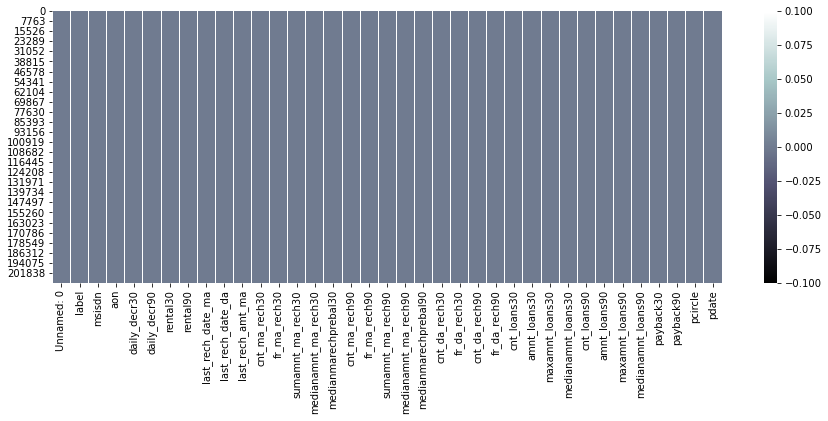

In [11]:
#heatmap for null values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='bone')
plt.show()

It is clear from the heatmap that there are no null values present in any of the column.

In [12]:
#lets check the duplicate values if there is any
df.duplicated().sum()

0

And we can see that there are no duplicate entries in the dataset.

In [13]:
#checking the unique values
df.nunique().to_frame('No.of Unique values')

,No.of Unique values
Unnamed: 0,209593
label,2
msisdn,186243
aon,4507
daily_decr30,147025
daily_decr90,158669
rental30,132148
rental90,141033
last_rech_date_ma,1186
last_rech_date_da,1174


#These are the number of unique values present in the dataset.





# Feature Engineering

* From the nunique() method, we can observe that the columns "Unnamed: 0" contains only index values also the column "msisdn" contains mobile number of the users. These columns are not contributing much for prediction also it has no relation with the target hence we can drop these columns.
* Also, we can notice the columns "pcircle" has only one unique value, so we can drop this column.

In [14]:
#checking the value count of pcircle column
print('value count of pcircle',df['pcircle'].value_counts())
#checking the unique value present in pcircle
print('\nNumber of unique values in pcircle',df['pcircle'].unique()) 

value count of pcircle UPW    209593
Name: pcircle, dtype: int64

Number of unique values in pcircle ['UPW']


In [15]:
#Droppin pcircle columm as it has unique value throughout the data
df.drop('pcircle',axis=1,inplace=True)

In [16]:
#Dropping irrelevant columns
df.drop(columns=['Unnamed: 0','msisdn'],inplace=True)

# Dealing with zero values

In [17]:

zero_value = pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False))
zero_value.columns = ['Count of Zero values']
zero_value['% of Zero values']=zero_value['Count of Zero values']/2095.93    #209593/100
zero_value

,Count of Zero values,% of Zero values
fr_da_rech90,208728,99.587295
fr_da_rech30,208014,99.246635
cnt_da_rech30,205479,98.037148
cnt_da_rech90,204226,97.439323
last_rech_date_da,202861,96.788061
medianamnt_loans90,197424,94.193985
medianamnt_loans30,195445,93.249775
payback30,106712,50.913914
payback90,95699,45.659445
fr_ma_rech30,78683,37.540853


From the above method of finding zero values we can observe that the features 
* fr_da_rech90
* fr_da_rech30
* cnt_da_rech30
* cnt_da_rech90
* last_rech_date_da
* medianamnt_loans90
* medianamnt_loans30 
are having zero values more than 90% which are not required for the predictions, so lets drop these columns.

In [18]:
# Dropping columns having more than 90% of zero values
df.drop(columns=["fr_da_rech90","fr_da_rech30","cnt_da_rech30","cnt_da_rech90","last_rech_date_da","medianamnt_loans90","medianamnt_loans30"],axis=1,inplace=True)

# Feature Extraction

The column **"pdate"** has object datatype which is in the form of dd/mm/yy so we need to convert it into datetime type. And we will extract day,month and year from the column **"pdate"**.

In [19]:
# Convert pdate column from object datatype to datetime type
df.pdate = pd.to_datetime(df.pdate)

In [20]:
#Extracting day, month and year from pdate column

#Extracting day, month and year from pdat column
df['Day'] =df['pdate'].dt.day

#Extracting month from pdate feature
df['Month'] =df['pdate'].dt.month

#Extracting year from pdate
df['Year'] =df['pdate'].dt.year


In [21]:
df[['Day','Month','Year']]

,Day,Month,Year
0,20,7,2016
1,10,8,2016
2,19,8,2016
3,6,6,2016
4,22,6,2016
...,...,...,...
209588,17,6,2016
209589,12,6,2016
209590,29,7,2016
209591,25,7,2016


In [22]:
# Dropping pdate column after separating day, month and year
df.drop("pdate",axis=1,inplace=True)

As we have extracted required information from pdate column,lets drop this column as it is of no use.

In [23]:
# Checking the unique value present in column 'Year'
print("No of unique values present in Year column:",df['Year'].nunique())
# Checking value counts of Year column
print("\nValue count of Year column:",df['Year'].value_counts())

No of unique values present in Year column: 1

Value count of Year column: 2016    209593
Name: Year, dtype: int64


* As we can see there is only one unique value that means all user data present in the dataset is collected in the same year 2016. We can also observe the value count of the column Year.
* We can drop this column **'Year'** since it wont affect our predictions

In [24]:
#Dropping Year column
df.drop("Year",axis=1,inplace=True)

In [25]:
# Cehcking dataframe after feature engineering
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,2.0,12,6,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,1.0,12,12,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,1.0,6,6,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,7.0,42,6,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,2,12,6.0,2.0,12,6,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,3,18,6.0,3.0,18,6,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,4,42,12.0,6.0,54,12,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,2,18,12.0,3.0,24,12,0.000000,10.500000,25,7


In [26]:
# Checking value counts of the label
print("The value count of the label is:\n",df['label'].value_counts())

The value count of the label is:
 1    183431
0     26162
Name: label, dtype: int64


This gives the list of values in the label. As we can see Label '1' indicates that the loan has been payed i.e Non defaulter which has 183431 values while Label '0' indicates that the loan has not been payed i.e defaulter which has 26162 values. So from this we can notice there is class imbalance issue exists which needs to be balanced before building machine learning model.

In [27]:
#Checking the vlaue count in column 'maxamnt_loan30'= maximum amount of loan taken by the user
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
94122.633158         1
59668.008360         1
                 ...  
66749.081149         1
55723.858041         1
31545.936341         1
66847.875001         1
96775.751803         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

* There are only two option : 5 & 10 rs. for which the user needs to pay back 6 & 12 rs. respectively.Also we can see zero entries which means the user haven't taken any kind of loan.
* But from the value_count we can observe the data other than 6,12 and 0. So the data other than these values need to be converted into 0 assuming the user haven't taken any kind of loan, because there is noother amount to be return other than 6 & 12.

In [28]:
# Checking the values which have entries other than 6,12,0
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30'] != 0.0),'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

So we can observe out of 1050 rows there are 1047 rows having values other than 6,12 & 0. Let's convert them into 0 values.

In [29]:
# Converting the values having other than 6,12 & 0 into 0 values
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30'] != 0.0),'maxamnt_loans30'] = 0.0

In [30]:
# Let's check the value counts of the column maxamnt_loan after converting values into 0
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

Now we have entries 6,12 and 0. We can observe there 4291 rows are having 0 values. That means user have not taken any kind of loan.

In [31]:
# Checking the value count in column 'maxamnt_loans90' = maximum amount of loans taken by the user in last 90 days
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

* The column maxamnt_loans90 has entries 0,6 and 12.
* Here we can observe there are 2043 rows having 0 values where the maximum amount of loan taken by the user in last 90 days. That means user have not taken any kind of loan.

In [32]:
# Checking the value count in column 'amnt_loans90' = Total amount of loans taken by the user in last 90 days
df["amnt_loans90"].value_counts().head(15)

6     69131
12    38908
18    23867
24    17216
30    12503
36     9589
42     7388
48     5627
54     4429
60     3503
66     2799
72     2254
0      2043
78     1730
84     1438
Name: amnt_loans90, dtype: int64

* From the value counts of amnt_loans30 and amnt_loans90 we can notice there are 3259 and 2043 rows have zero values. Let's remove the zero values in the column amnt_loans90 as it gives the sum of loans taken by the user in 90 days(It covers loan taken by the user in 30 days as well)

In [33]:
# Dropping the rows from amnt_loans90 data where loan values are 0
df.drop(df.loc[(df['amnt_loans90']==0.0)].index,inplace=True)

In [34]:
# Checking value count after removing the rows containg 0 values
df['amnt_loans90'].value_counts().head(15)

6     69131
12    38908
18    23867
24    17216
30    12503
36     9589
42     7388
48     5627
54     4429
60     3503
66     2799
72     2254
78     1730
84     1438
90     1184
Name: amnt_loans90, dtype: int64

In [35]:
# Checking the shape of the dataset after removing the rows
df.shape


(207550, 28)

In [36]:
# Checking data loss after removing rows having 0 values
data_loss =(209593-207550)/209593*100
data_loss

0.9747462940079105

After removing the rows having zero entries we are losing only 0.97% of data which is acceptable.

## Description of dataset

In [37]:
#Statistical summary od dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,207550.0,0.873948,0.331908,0.000000,1.0000,1.000000,1.0000,1.000000
aon,207550.0,8095.156177,75605.569198,-48.000000,246.0000,527.000000,982.0000,999860.755168
daily_decr30,207550.0,5352.424286,9208.694592,-93.012667,41.7600,1414.400000,7200.0000,265926.000000
daily_decr90,207550.0,6044.967417,10902.815812,-93.012667,41.9795,1443.355000,7723.9975,320630.000000
rental30,207550.0,2674.303807,4272.953526,-23737.140000,278.1300,1074.880000,3330.5700,198926.110000
rental90,207550.0,3451.557712,5714.928132,-24720.580000,299.8300,1318.480000,4163.5700,200148.110000
last_rech_date_ma,207550.0,3744.288249,53813.277038,-29.000000,1.0000,3.000000,7.0000,998650.377733
last_rech_amt_ma,207550.0,2057.044751,2363.829442,0.000000,770.0000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,207550.0,3.991477,4.264318,0.000000,1.0000,3.000000,5.0000,203.000000
fr_ma_rech30,207550.0,3728.164201,53603.753070,0.000000,0.0000,2.000000,6.0000,999606.368132


* The describe method gives the statistical information of the dataset. The summary of this dataset is not perfect since there are some features having negative minimum values which are invalid values which needs to take care of by converting negative values into positive values.
The following features have negative values:
    *aon - age on cellular network in days.
    * daily_decr30 - Daily amount spent from main account, averaged over last 30 days(in Indonesian Rupiah)
    * daily_decr90 - Daily amount spent from main account, averaged over last 90 days(in Indonesian Rupiah)
    * rental30 - Average main account balance over last 30 days
    * rental90 - Average main account balance over last 90 days
    * last_rech_date_ma - Number of days till last recharge of main account
    * medianmarechprebal30 - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    * medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)

In [38]:
# Converting negative values present in the above features into positive values
df['aon'] = abs(df['aon'])
df['daily_decr30'] = abs(df['daily_decr30'])
df['daily_decr90'] = abs(df['daily_decr90'])
df['rental30'] = abs(df['rental30'])
df['rental90'] = abs(df['rental90'])
df['last_rech_date_ma'] = abs(df['last_rech_date_ma'])
df['medianmarechprebal30'] = abs(df['medianmarechprebal30'])
df['medianmarechprebal90'] = abs(df['medianmarechprebal90'])

In [39]:
# Checking the statistical summary of the datseet after converting negative to positive
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,207550.0,0.873948,0.331908,0.0,1.0000,1.000000,1.0000,1.000000
aon,207550.0,8095.625616,75605.518933,1.0,246.0000,527.000000,982.0000,999860.755168
daily_decr30,207550.0,5352.453575,9208.677568,0.0,41.7600,1414.400000,7200.0000,265926.000000
daily_decr90,207550.0,6044.996776,10902.799534,0.0,41.9835,1443.355000,7723.9975,320630.000000
rental30,207550.0,2697.321812,4258.460653,0.0,299.6900,1088.165000,3334.7500,198926.110000
rental90,207550.0,3477.845090,5698.968928,0.0,326.3400,1332.425000,4167.7625,200148.110000
last_rech_date_ma,207550.0,3744.568567,53813.257533,0.0,1.0000,3.000000,7.0000,998650.377733
last_rech_amt_ma,207550.0,2057.044751,2363.829442,0.0,770.0000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,207550.0,3.991477,4.264318,0.0,1.0000,3.000000,5.0000,203.000000
fr_ma_rech30,207550.0,3728.164201,53603.753070,0.0,0.0000,2.000000,6.0000,999606.368132


We have successfully converted negative values and the dataset looks perfect and have no invalid values.

From the above description we can observe the following things:
   * The counts of all the columns are same which means there are no missing values present in the dataset.
   * In all the features, the mean value is greater than the median (50%) which means all the columns are skewed to right except the target column label which has mean value bit less than median that means it is skewed to left.
   * By summarizing the data I can notice there is a huge difference between maximum value and 75% percentile that leads to large number of outliers present in the dataset. We will remove these outliers using appropriate methods.
   * From the above summary we can notice the mean value of label is 0.873948.

# Data Visualization


# Univariate Analysis


# Target Variable (label)

In [40]:
Rows = df.shape[0]
Non_Defaulter = df[df['label'] == 1].shape[0]
Defaulter = df[df['label'] == 0].shape[0]
print("Total record = ",Rows)
print("Non_Defaulter = ",Non_Defaulter)
print("Defaulter = ",Defaulter) 

Total record =  207550
Non_Defaulter =  181388
Defaulter =  26162


1    181388
0     26162
Name: label, dtype: int64


<Figure size 720x432 with 0 Axes>

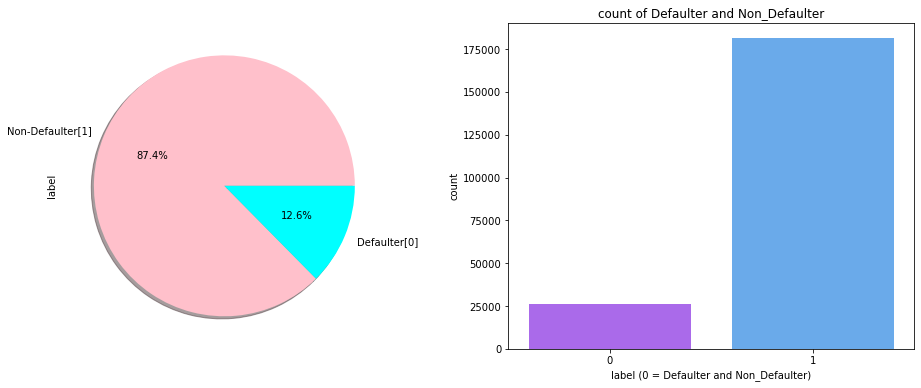

In [41]:
plt.figure(figsize=(10,6))
print(df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['Non-Defaulter[1]','Defaulter[0]']
colors = ["Pink","Cyan"]
df['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors)
sns.countplot(df['label'],palette='cool_r')
plt.title('count of Defaulter and Non_Defaulter')
plt.xlabel('label (0 = Defaulter and Non_Defaulter)')
plt.show()

From the above plots we can observe arount 87% of the loan has been paid by the user and only 12% of the loan failed to pay. Also the dataset is highly imbalanced, which needs to get balanced or else the model will get more biased towards success and make more false interpretentions.



# Distribution of skewness

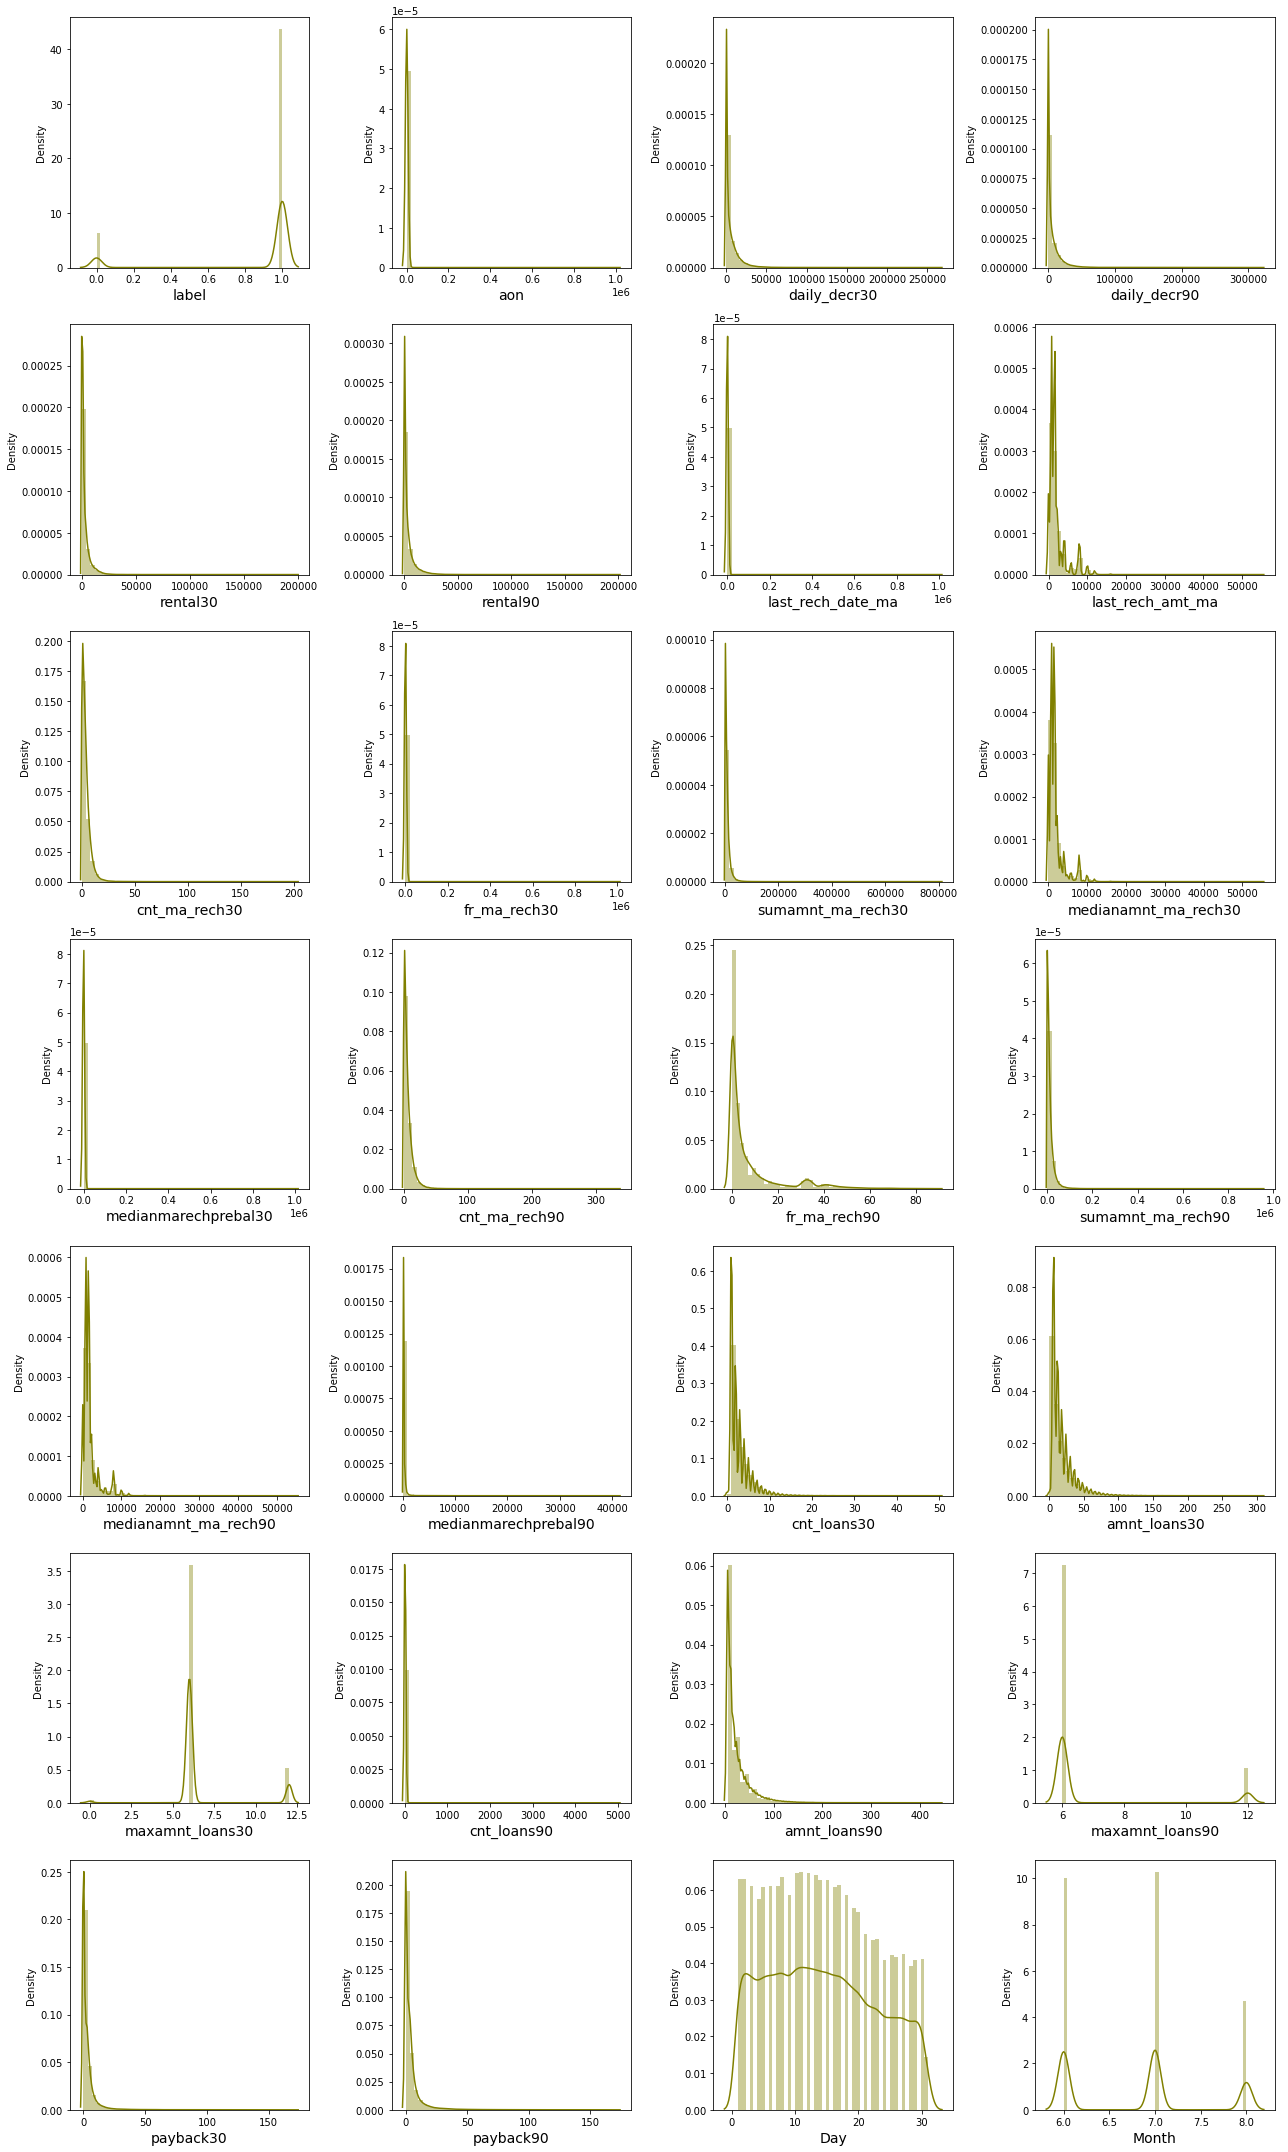

In [42]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for col in df:
    if plotnumber<=28:
        ax = plt.subplot(7,4,plotnumber)
        sns.distplot(df[col],color='olive')
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Observations:
* From the above distribution plot, it is observed that mostof the columns are not normally distributed, only Day column is some what distributed normally.
* All the columns have skewness and are skewed to right since the mean is greater than the median in these columns. We need to remove this skewness before building our machine learning models. 

# Bivariate Analysis:

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

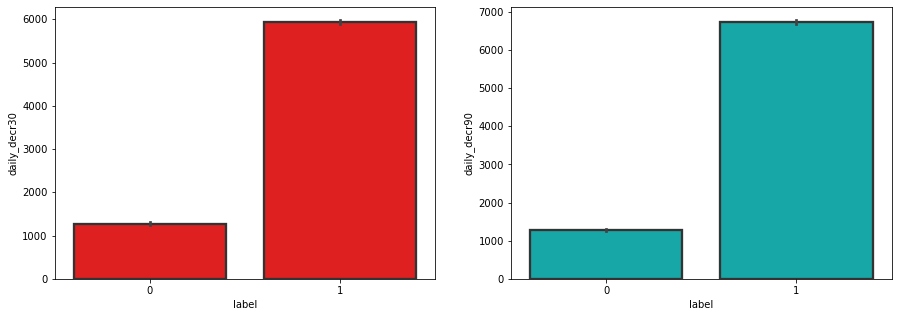

In [43]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
# Comparing Label vs Daily amount spent from main account, averaged over \n last 30 days
sns.barplot(x='label',y='daily_decr30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",color="r")
 
# Comparing Label vs Daily amount spent from main account, averaged over \n last 90 days
sns.barplot(x='label',y='daily_decr90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",color="c")

# Observations:
* Most of the users who have paid back the credit amount within 5 days of issuing loan,they have high rate of daily amount spent from the account over last 30 days and 90 days which have the count around 5900 and 6700 respectively.
* The users who have spent daily amount from main amount over last 30 days and 90 days have always paid back the loan amount paid back the loan amount within 5 days. Around 1200 of the users failed to pay back the loan within due date



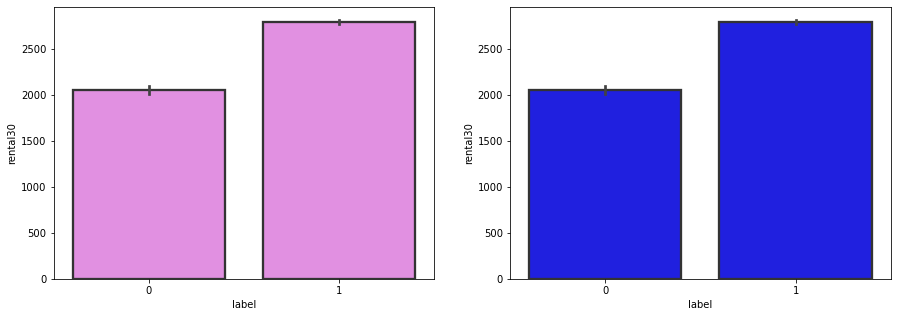

In [44]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing Label vs Average main account balance over last 30 days
sns.barplot(x='label',y='rental30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",color="violet")

# Comparing label vs Average main account balance over last 90 days
sns.barplot(x='label',y='rental30',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",color="blue")

plt.show()

# Observations:
* Non defaulter users have average main account balance over last 30 days and 90 days is high compared to defaulter.
* That means the users who have average main account balance always pays back the credit amounts within 5 days.

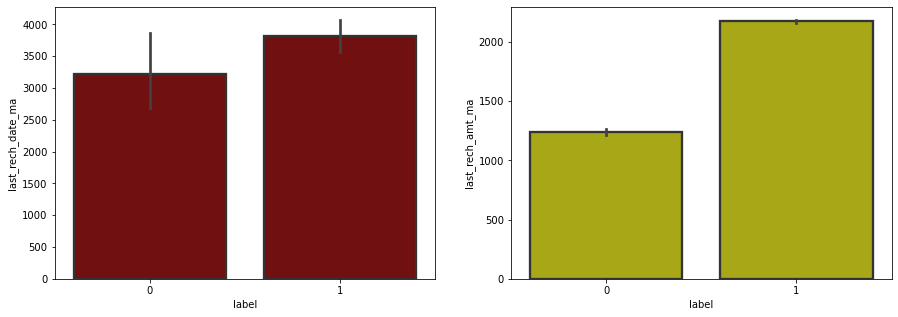

In [45]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Number of days till last recharge of main account
sns.barplot(x='label',y='last_rech_date_ma',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",color="maroon")

# Comparing label vs Number of days till last recharge of data account
sns.barplot(x='label',y='last_rech_amt_ma',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",color="y")

plt.show()

# Observations:
* The users who have recharged their main account on time are most likely to pay back their loan amount within 5 days. Also some of the users who have not paid their loan within 5 days they also recharged their main amount on time.
* Looking at above plot of last_rech_amt_ma, we can say that if the amount of last recharge of main account is around 2000 than a greater number of people will pay back the loan amount.
    

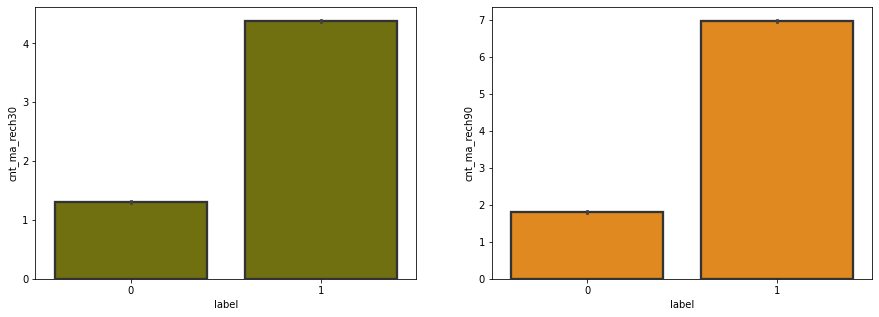

In [46]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Frequency of main account recharged in last 30 days
sns.barplot(x='label',y='cnt_ma_rech30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",color="olive")

# Comparing label vs Frequency of main account recharged in last 90 days
sns.barplot(x='label',y='cnt_ma_rech90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",color="darkorange")

plt.show()

#### Observations:
* The non defaulters got recharged their main account more than 4 times in last 30 days and defaulters used to recharge their main account 1 time.
* The users who have paid back their loan within 5 days have got recharged their main account upto 7 times in last 90 days and the users who have not been paid loan within due date, they have got recharged their main account twice in last 90 days.
* From both the plots we can say that the users who got recharged their main account maximum times, they are able to pay back their loan amount within 5 days compared to the users who got their main account recharegd less than 2 times.

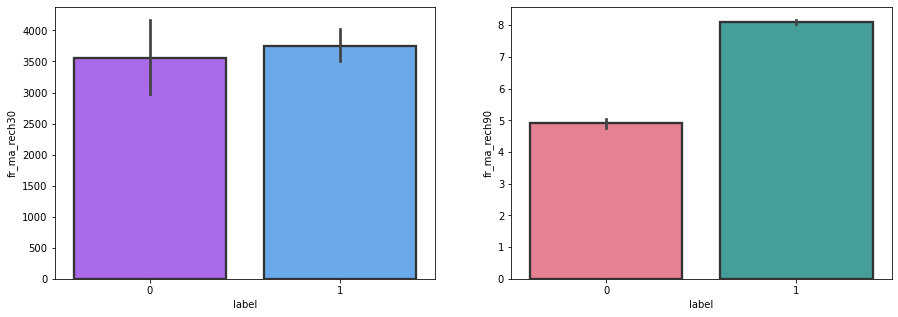

In [47]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Number of times main account got recharged in last 30 days
sns.barplot(x='label',y='fr_ma_rech30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",palette="cool_r")

# Comparing label vs Number of times main account got recharged in last 90 days
sns.barplot(x='label',y='fr_ma_rech90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",palette="husl")

plt.show()

# Observations:
* The count of defaulters and non defaulters is almost similar for the frequency of main account recharged in last 30 days. They didn't pay back the loan within 5 days which means it is not contributing more for predictions
* The frequency of maina ccount recharged in last 90 days is increased for non defaulters compared to defaulters.
* From the frequency of main account recharged in last 30 days & 90 days we have seen the users with low frequency are causing huge loses, company ahould implement some kind of strategies to reduce that lake send SMS alert for notification.

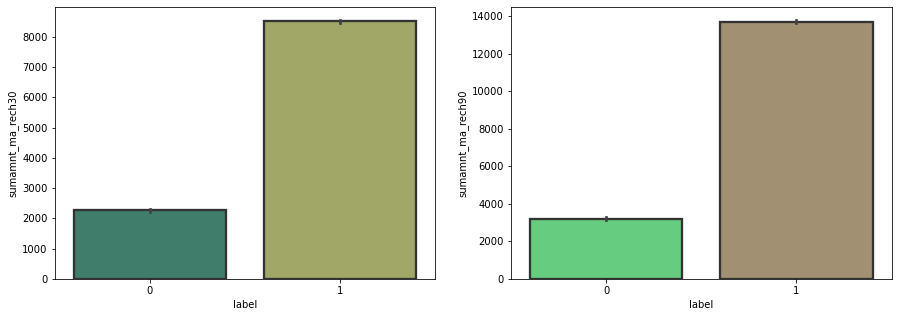

In [48]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
sns.barplot(x='label',y='sumamnt_ma_rech30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",palette="gist_earth")

# Comparing label vs Total amount of recharge in main account over last 90 days (in Indonesian Rupiah)
sns.barplot(x='label',y='sumamnt_ma_rech90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",palette="terrain")

plt.show()

# Observations:
* The users who failed to pay back the loan within 5 days have less amount of recharge in their maina ccount over last 30 days which is around 2000-2400(in Indonesian Rupiah). And the user who paid back their loan within 5 days, they are recharging their main account more than 8000 in last 30 days.
* The users who have paid their loan amount within 5 days have the total amount of recharge int heir main account around 13700(Indonesian Rupiah) in last 90 days while the defaulters ahve their total amount of recharge around 3200 over last 90 days.

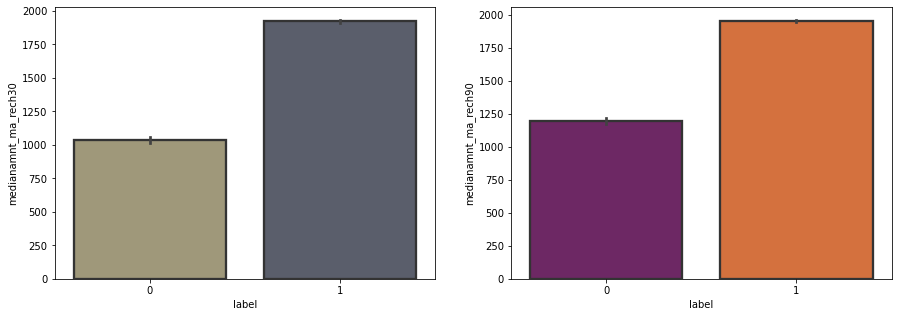

In [49]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
sns.barplot(x='label',y='medianamnt_ma_rech30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",palette="cividis_r")

# Comparing label vs Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah)
sns.barplot(x='label',y='medianamnt_ma_rech90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",palette="inferno")

plt.show()

# Observations:

* The users who have done their median amount of recharge of 1920 (Indonesian Rupiah) in main account over last 30 days have successfully paid their credit amount within 5 days of issuing loan while the users who have done amount recharge of 1036 have failed to pay back the loan within due date.
* Similar to 30 days data, here also the users who have done their median amount recharge of 1950 in their main account over last 90 days they have paid back their credit amount within 5 days while the users having their median amount 1198 have not paid the loan within 5 days.

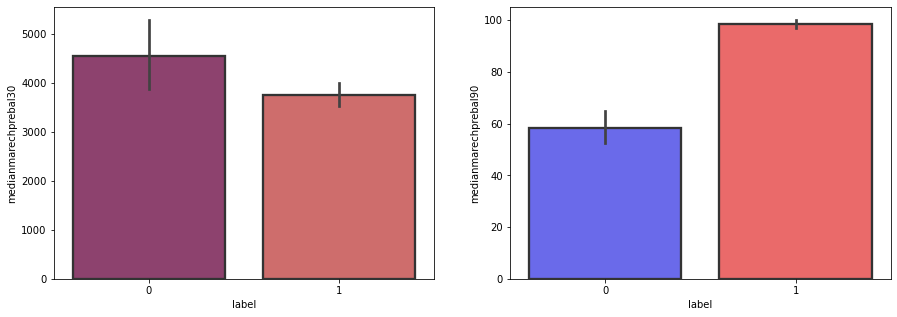

In [50]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
sns.barplot(x='label',y='medianmarechprebal30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",palette="flare_r")

# Comparing label vs Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupiah)
sns.barplot(x='label',y='medianmarechprebal90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",palette="seismic")

plt.show()

# Observations:

* In 30 days data, the median of main account balance for defaulters are around 4500 (Indonesian Rupiah) which is high compared to non-defaulters. Which means increasing median of main account balance just before recharge in last 30 days at user level, increasing the probability to being defaulter.
* In last 90 days data, the median of main account balance for non-defaulters are around 100 (Indonesian Rupiah) which is high compared to defaulters. Which means increasing median of main account balance just before recharge in last 90 days at user level, increasing the probability of being non-defaulters.

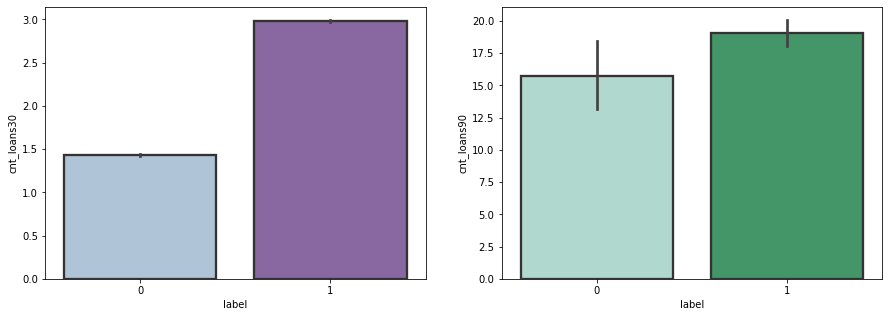

In [51]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Number of loans taken by user in last 30 days
sns.barplot(x='label',y='cnt_loans30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",palette="BuPu")

# Comparing label vs Number of loans taken by user in last 90 days
sns.barplot(x='label',y='cnt_loans90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",palette="BuGn")

plt.show()

# Observations:

* Defaulters have taken 1 loan in last 30 days that is when a person takes loan amount for 1 time in last 30 days the chances of not paying back the credit amount are higher. And the users who have paid back the loan, they have taken maximum number of 3 loans in last 30 days data.
* In 90 days data, the number of loans taken by the defaulters are highly increasing also increasing the probability to being defaulter. Also, the number of loans taken by non-defaulters being decreased in last 90 days when compared to 30 days data.

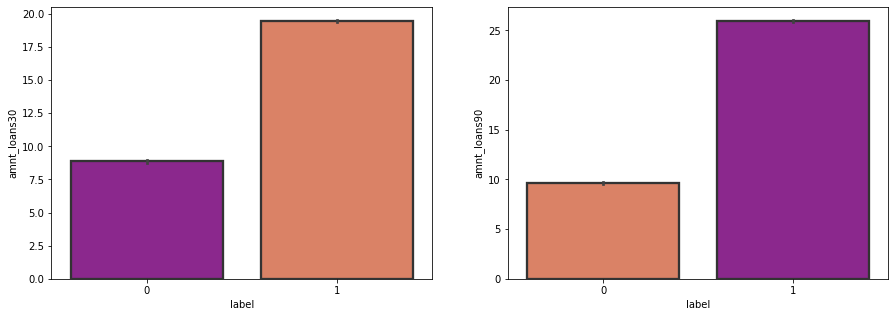

In [52]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Total amount of loans taken by user in last 30 days
sns.barplot(x='label',y='amnt_loans30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",palette="plasma")

# Comparing label vs Total amount of loans taken by user in last 90 days
sns.barplot(x='label',y='amnt_loans90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",palette="plasma_r")

plt.show()

# Observations:

* The total amount of loans taken by the defaulters in last 30 days are in the range of 7.5-10 while the non-defaulters have taken upto 20 loans in last 30 days.
* The total amount of loans taken by the defaulters in last 90 days are upto 10 and the non- defaulters have taken total amount of loans upto 26 in last 90 days.
* So, from the above plot we can conclude that when the total number of loans taken by the users in last 90 days is below 10, then the chances of not paying back the loan amount are high.

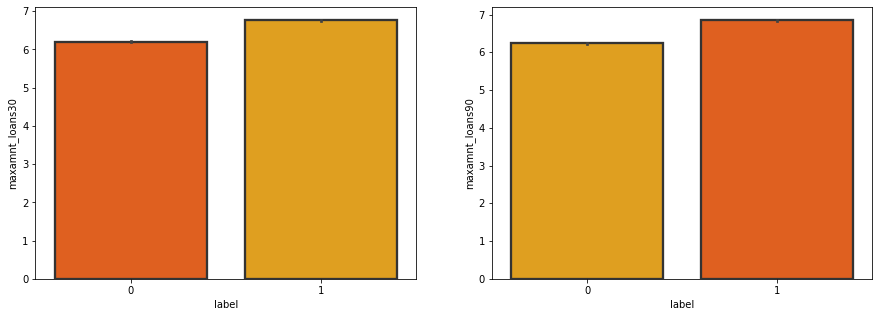

In [53]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs maximum amount of loan taken by the user in last 30 days
sns.barplot(x='label',y='maxamnt_loans30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",palette="autumn")

# Comparing label vs maximum amount of loan taken by the user in last 90 days
sns.barplot(x='label',y='maxamnt_loans90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",palette="autumn_r")

plt.show()

# Observations:

* The maximum amount of loan taken by the user in last 30 days and 90 days are almost same. The maximum amount of loan taken by the defaulters and non-defaulters are upto 6 and 7 respectively in last 30 and 90 days.
* So from the plot we can say that whenever the user takes the maximum loan amount of 6, then only some users may not pay back the loan amount.

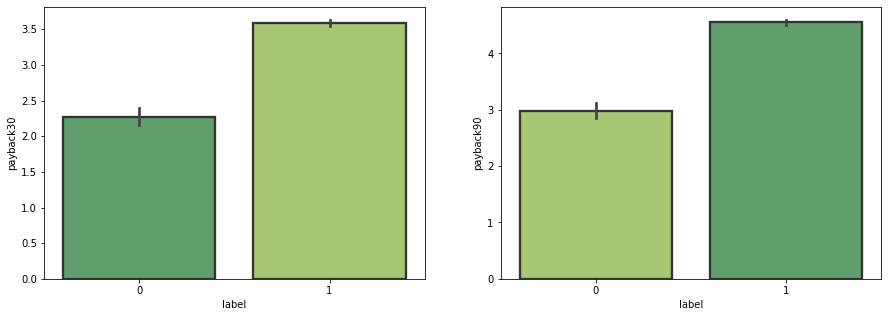

In [54]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

# Comparing label vs Average payback time in days over last 30 days
sns.barplot(x='label',y='payback30',ax=axes[0],data=df, linewidth=2.3, edgecolor=".2",palette="summer")

# Comparing label vs Average payback time in days over last 90 days
sns.barplot(x='label',y='payback90',data=df,ax=axes[1],linewidth=2.3, edgecolor=".2",palette="summer_r")

plt.show()

# Observations:

* The defaulters are paying back their loan in an average of 2-2.5 days and the non-defaulters are paying back their loan in an average of 3 days over last 30 days.
* The defaulters in last 90 days, are paying back their loan in an average of 3 days and non-defaulters are paying back their loan in 4-5 days over last 90 days.
* It is seen from the plot that when an average payback time is below 3 days over last 30 & 90 days, then defaulters' rate is high.

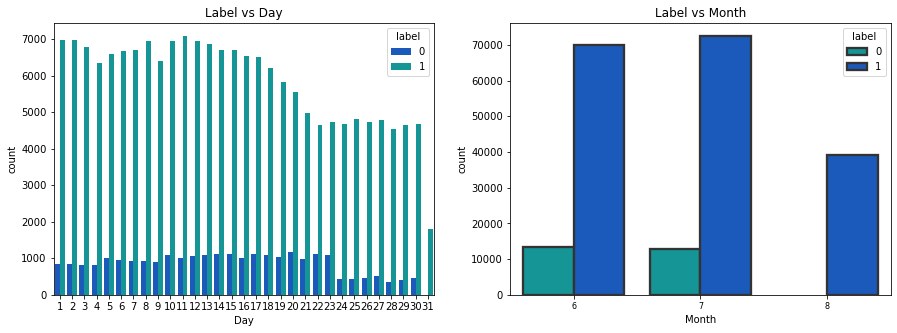

In [55]:
plt.figure(figsize=(15,5))

# Comparing label vs Day
plt.subplot(1,2,1)
sns.countplot(x=df['Day'],hue=df["label"],linewidth=2.3,palette="winter")
plt.title('Label vs Day')

# Comparing label vs Average payback time in days over last 90 days
plt.subplot(1,2,2)
sns.countplot(x=df['Month'],hue=df['label'],linewidth=2.3, edgecolor=".2",palette="winter_r")
plt.title('Label vs Month')
plt.xticks(fontsize='8')
plt.show()

#### Observations:

* The users who have taken loans in the month of august, they seem paying back their loan within 5 days.

# Identifying the outliers:

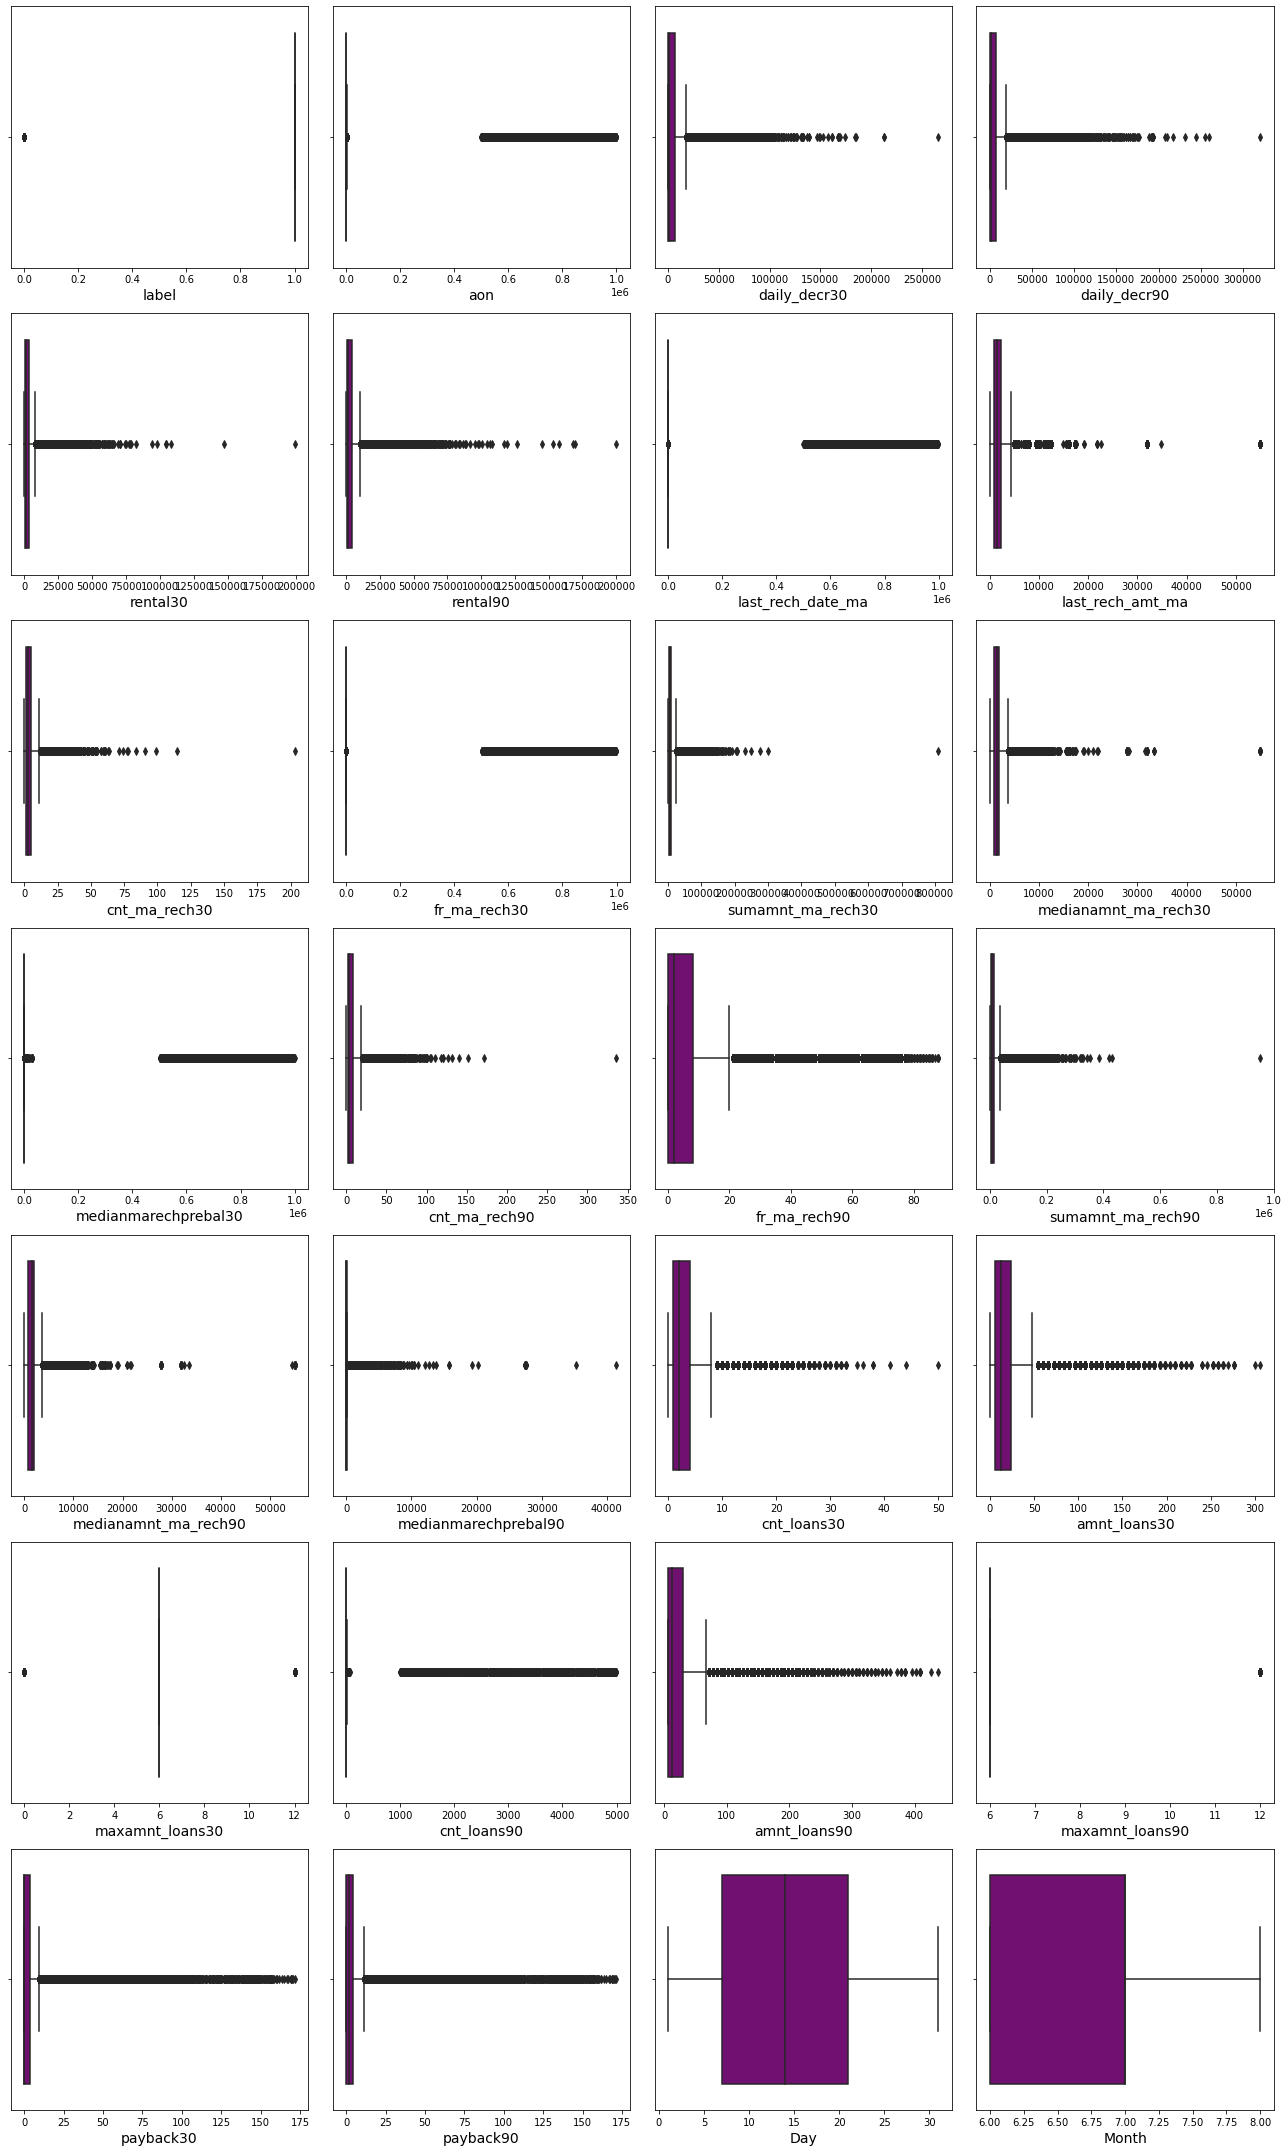

In [56]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30),facecolor="white")
plotnumber=1

for col in df:
    if plotnumber<=28:
        ax = plt.subplot(7,4,plotnumber)
        sns.boxplot(df[col],color='purple')
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the above box plot we can notice the outliers present in all the features except Day and Month columns. Let's remove the outliers in these columns except Day, Month and label. Since label is our target columns we should not loose any data by removing outliers in this column.

# Removing outliers


# 1. Zscore method

In [42]:
# Feature containing outliers
features= df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30','payback90']]

In [43]:
#using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

In [44]:
new_df = df[(z<3).all(axis=1)]
new_df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,2.0,12,6,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,1.0,12,12,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,1.0,6,6,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,7.0,42,6,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,2,12,6.0,2.0,12,6,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,3,18,6.0,3.0,18,6,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,4,42,12.0,6.0,54,12,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,2,18,12.0,3.0,24,12,0.000000,10.500000,25,7


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3

In [45]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)


Shape of dataset before removing outliers: (207550, 28)
Shape of dataset after removing outliers: (170071, 28)


In [46]:
# Checking the the data loss after removing outliers
data_loss = (207550-170071)/207550*100
data_loss

18.05781739339918

By using Zscore I am losing around 19% of data which is not acceptable. The acceptable range of data loss is 7-8%. So let's try to remove outliers using IQR method.

# 2. IQR(Inter Quantile Range) method

In [47]:
#1st quantile
Q1=features.quantile(0.25)

#3rd quantile
Q3=features.quantile(0.75)

#IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) | (df>(Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (78654, 28)


In [48]:
# Checking the the data loss after removing outliers
data_loss = (207550-78654)/207550*100
data_loss

62.103589496506864

By using Zscore and IQR method there is a large amount of data loss, let's use percentile method to remove the outliers by setting the dataloss to 2%.

# 3. Percentile method

In [49]:
#Removing outliers using percentile method in train dataset
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

I have successfully removed the outliers present in dataset using percentile method.

# Checkwing the skewness

In [50]:
#Checking the skewness
df.skew()

label                  -2.253346
aon                     0.934791
daily_decr30            1.978547
daily_decr90            2.098290
rental30                2.117210
rental90                2.205817
last_rech_date_ma       2.565623
last_rech_amt_ma        2.016661
cnt_ma_rech30           1.410702
fr_ma_rech30            1.703431
sumamnt_ma_rech30       1.749207
medianamnt_ma_rech30    2.122065
medianmarechprebal30    2.799234
cnt_ma_rech90           1.566573
fr_ma_rech90            1.987801
sumamnt_ma_rech90       1.863681
medianamnt_ma_rech90    2.143777
medianmarechprebal90    2.631175
cnt_loans30             1.597669
amnt_loans30            1.752260
maxamnt_loans30         1.634976
cnt_loans90             2.000454
amnt_loans90            1.910837
maxamnt_loans90         2.224471
payback30               2.635055
payback90               2.826565
Day                     0.184762
Month                   0.358219
dtype: float64

Here we can observe the skewness present in all the columns except Day and Month. Since label is our target variable no need to remove skewness in this column as well. Lets remove the columns having skewness more than +0.5 & -0.5 using power transformation method(yeo-johnson method).

# Removing skewness using yeo-johnon method

In [51]:
# Removing skewness using yeo-johnson  method to get better prediction
features= ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']


In [52]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [53]:
df[features] = scaler.fit_transform(df[features].values)
df[features]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.698192,0.502635,0.480196,-0.815119,-0.801254,-0.334457,0.085229,-0.297080,1.714875,-0.194777,0.210746,-0.733979,-0.593082,1.343046,-0.458284,0.150784,-0.861205,0.061605,0.000696,-0.279514,-0.196942,-0.210633,-2.490785e-13,1.790975,1.826511
1,0.387246,1.123583,1.076317,0.794042,0.630619,1.542566,1.549424,-0.817015,-1.126969,0.218868,1.698387,0.382366,-1.036095,-1.206521,-0.094601,1.758611,0.360413,-1.073631,0.000696,2.331154,-1.139781,-0.210633,1.694186e-12,-0.945737,-1.027712
2,0.041209,0.187550,0.173246,-0.123498,-0.219266,-0.005757,0.085229,-0.817015,-1.126969,-0.562266,0.210746,0.434698,-1.036095,-1.206521,-0.784083,0.150784,0.419599,-1.073631,-1.136978,-0.279514,-1.139781,-1.195396,-2.490785e-13,-0.945737,-1.027712
3,-0.819499,-1.120125,-1.117515,-0.947896,-0.995637,2.044467,-0.297189,-1.677889,-1.126969,-1.901468,-1.964699,-1.653437,-1.036095,-1.206521,-0.974270,-0.261525,-1.290842,0.061605,0.000696,-0.279514,-0.196942,-0.210633,-2.490785e-13,-0.945737,-1.027712
4,0.754265,-0.582302,-0.581745,-0.008841,-0.112338,0.235710,0.461086,1.012640,0.158382,1.322032,0.590987,-0.059496,0.662689,-0.060101,1.015503,0.813732,-0.014428,1.558211,1.446464,-0.279514,1.224605,1.155690,-2.490785e-13,0.625541,0.413261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.278836,-0.579762,-0.579232,-0.014038,-0.117181,-0.833241,1.082242,0.079341,0.158382,0.685801,0.933723,0.645899,-0.272179,-0.060101,0.312805,0.929319,0.660085,0.061605,0.000696,-0.279514,-0.196942,-0.210633,-2.490785e-13,0.077050,-0.119516
209589,0.924703,-0.980848,-0.978014,0.268899,0.145770,0.235710,-0.438006,0.375692,-0.272800,-0.192092,-0.316200,1.035209,0.368101,-0.060101,-0.310512,-0.412329,0.812459,0.646390,0.550349,-0.279514,0.325965,0.290132,-2.490785e-13,0.077050,-0.119516
209590,0.844267,1.112351,1.067842,1.155109,1.285978,-0.005757,0.085229,0.620705,1.117370,0.592674,0.210746,0.272694,1.005387,0.512038,0.795251,0.150784,0.181414,1.004987,1.446464,2.331154,1.083867,1.369033,1.694186e-12,0.967619,0.741195
209591,1.608771,1.137984,1.093184,-0.531384,-0.171704,-0.334457,-0.438006,0.620705,0.639283,0.824974,-0.316200,1.047137,0.368101,0.371371,0.763085,0.606688,0.725548,0.061605,0.550349,2.331154,0.325965,0.610708,1.694186e-12,-0.945737,1.349216


In [54]:
# Checking skewness after using yeo-johnson method
df[features].skew()

aon                    -0.059261
daily_decr30           -0.137650
daily_decr90           -0.127335
rental30               -0.062522
rental90               -0.062946
last_rech_date_ma       0.043916
last_rech_amt_ma       -0.106643
cnt_ma_rech30          -0.010536
fr_ma_rech30            0.131926
sumamnt_ma_rech30      -0.369147
medianamnt_ma_rech30   -0.237104
medianmarechprebal30   -0.046085
cnt_ma_rech90          -0.012334
fr_ma_rech90            0.141522
sumamnt_ma_rech90      -0.266852
medianamnt_ma_rech90   -0.101431
medianmarechprebal90   -0.029793
cnt_loans30             0.219771
amnt_loans30            0.146844
maxamnt_loans30         0.381337
cnt_loans90             0.201541
amnt_loans90            0.129122
maxamnt_loans90         0.000000
payback30               0.278283
payback90               0.193524
dtype: float64


We can observe the skewness has almost been reduced in all the columns.

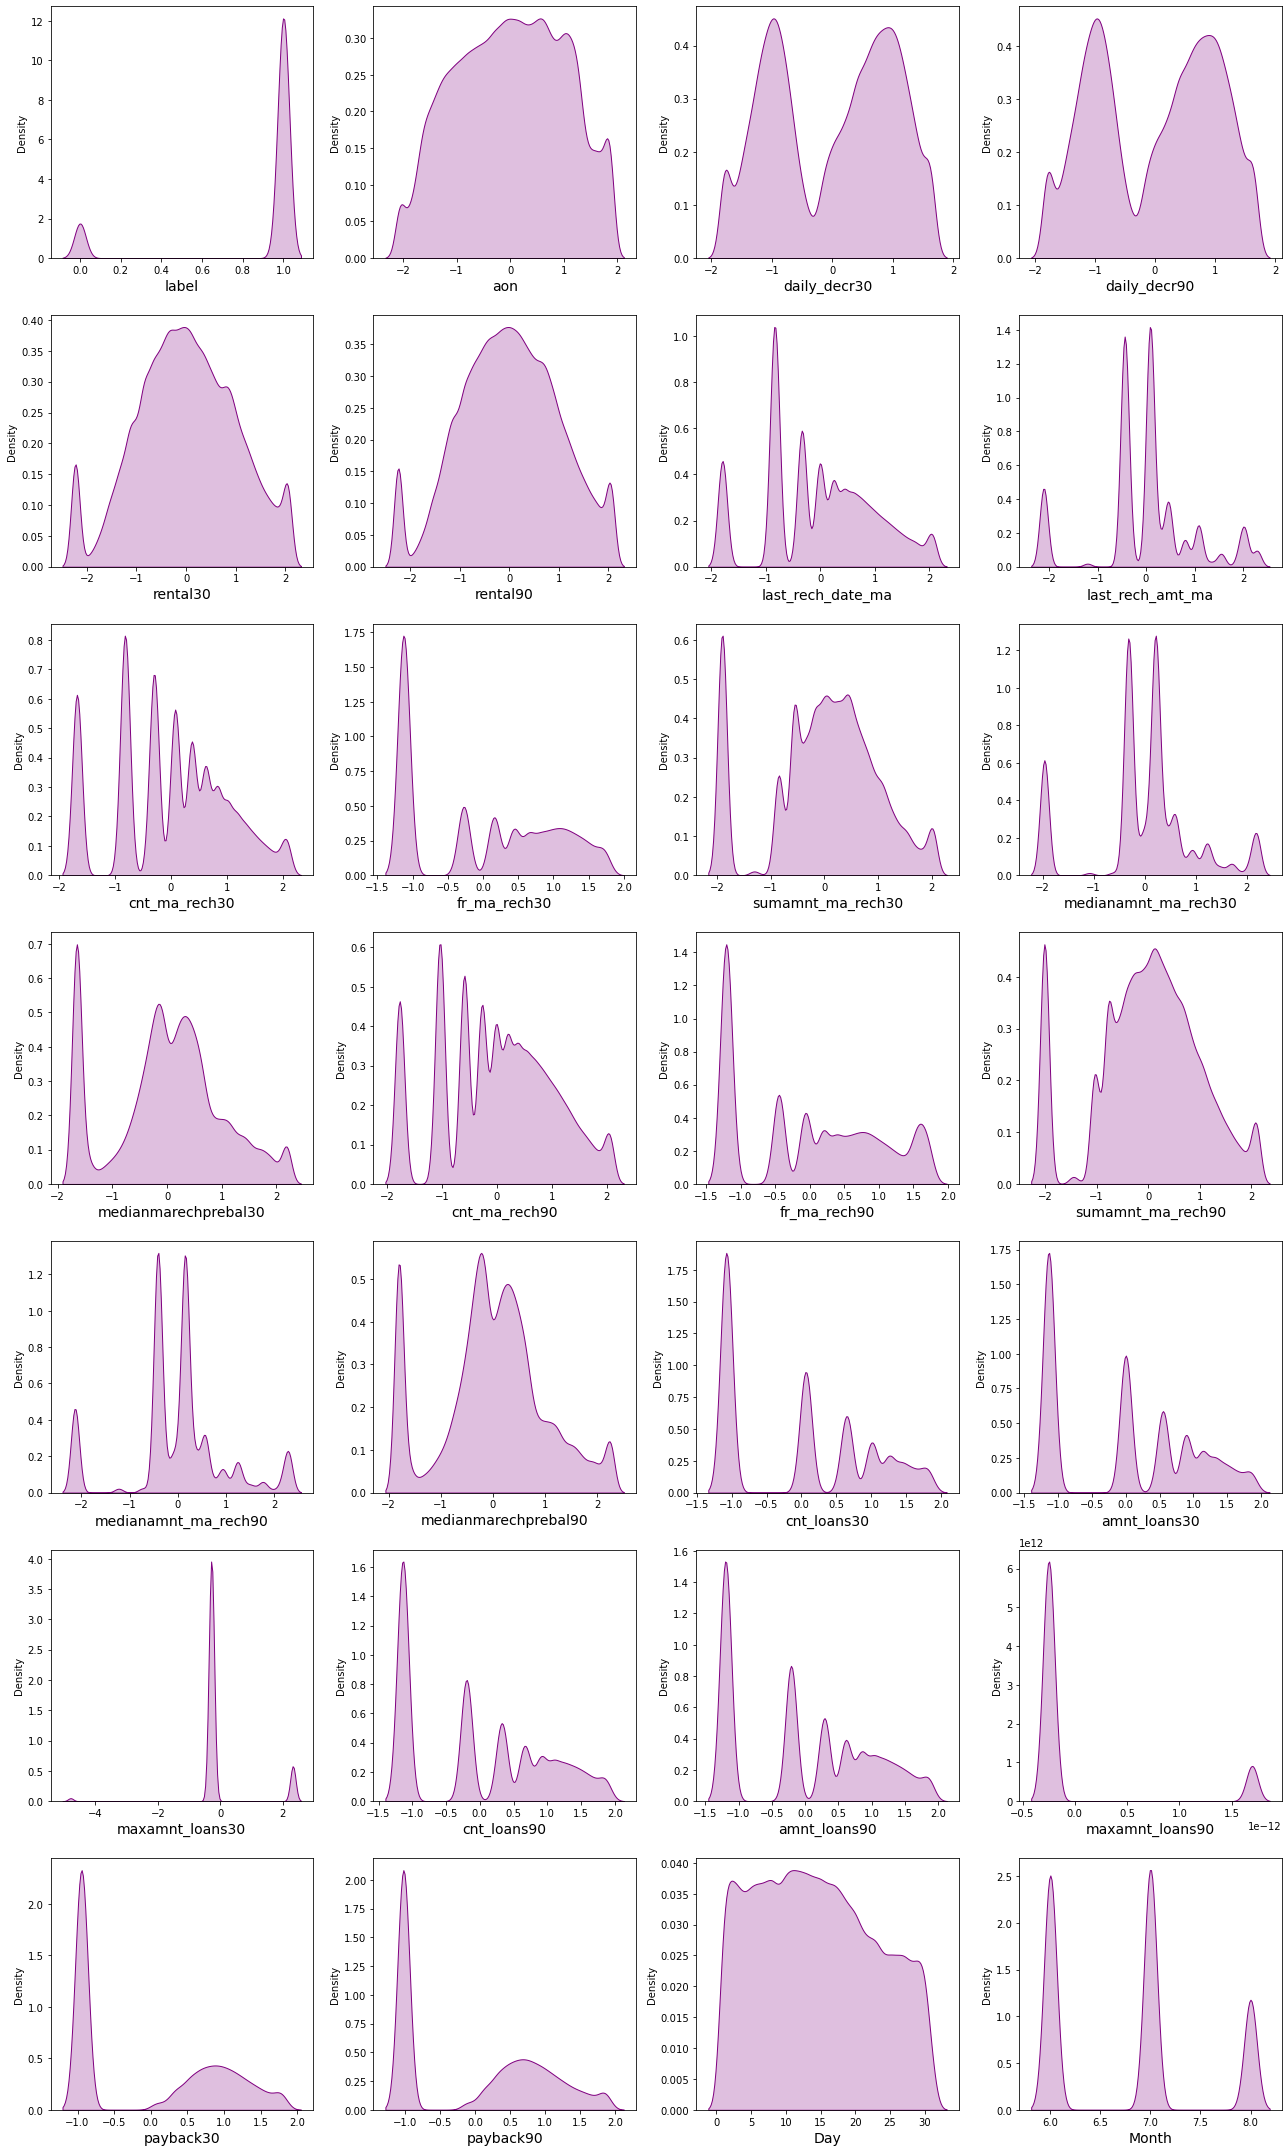

In [55]:
# Checking how the data has been distriubted in each column after removing skewness
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(df[column],color="purple",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the above dist plots we can see that the data has been distributes normally in some of the columns and the skewness is also reduced compared to the previous data.

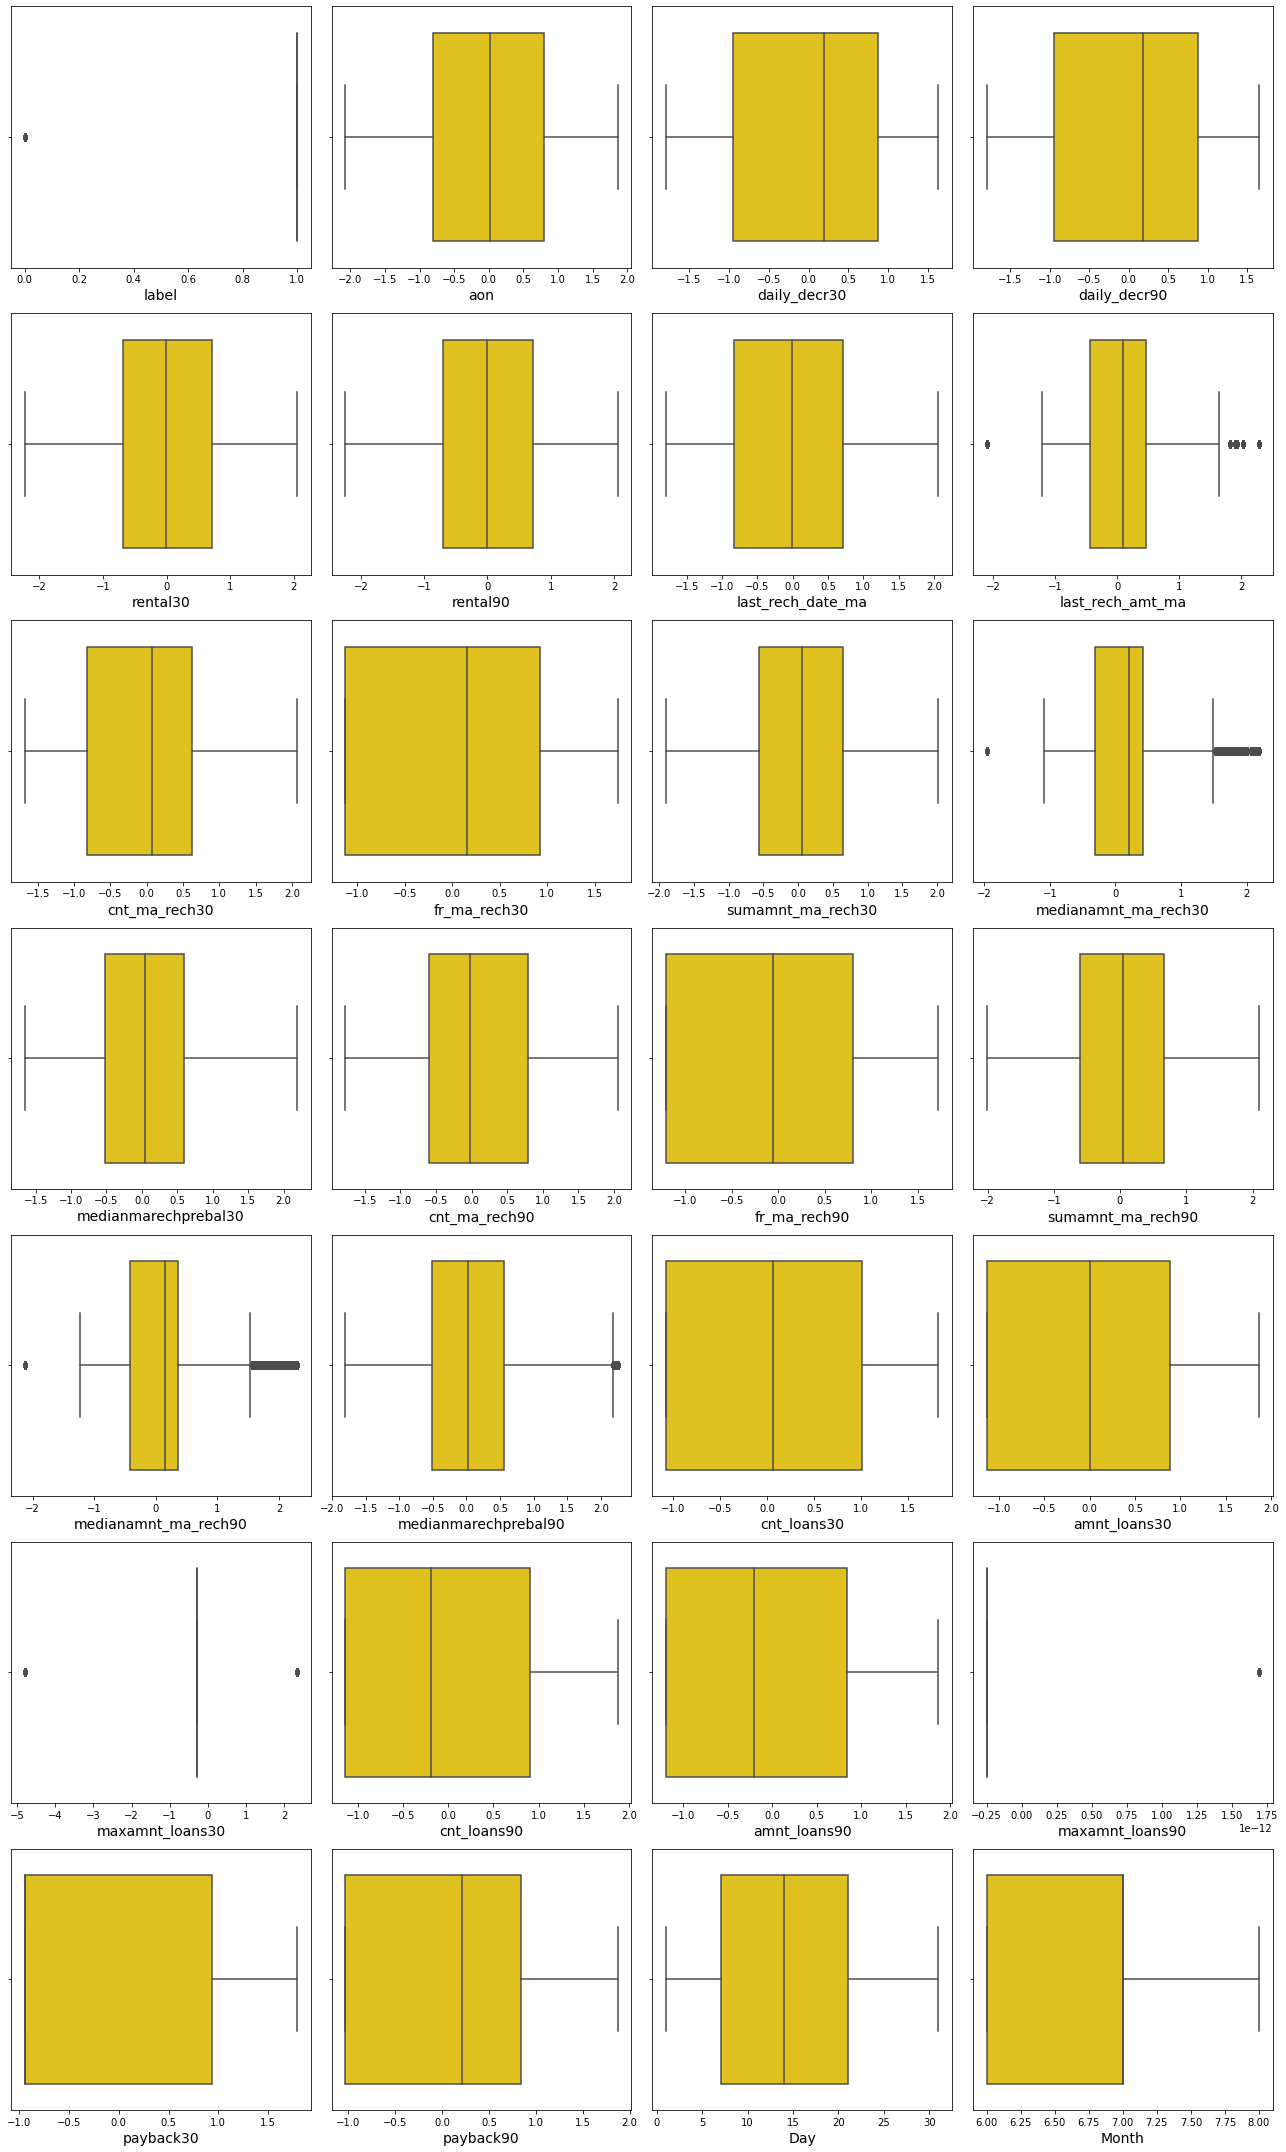

In [56]:
# Checking the outliers after using percentile method
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color="gold")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Its good to see that the outliers are almost removed in many columns after using percentile method and after removing skewness.

After cleaning the data we got only numerical data throughout the dataset. Since all the features in the dataset are numerical so no need to encode the data.

# Checking Correlation between features and label using heatmap

In [57]:
# Checking the correlation between features and the target variable
cor = df.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
label,1.000000,0.097208,0.266444,0.268775,0.142205,0.155661,0.064305,0.262083,0.347162,0.243564,0.361711,0.279565,0.266752,0.363878,0.221068,0.370102,0.252702,0.257523,0.276082,0.291492,0.075952,0.293548,0.309039,0.101247,0.236554,0.244596,0.008241,0.151680
aon,0.097208,1.000000,0.117096,0.117840,0.084111,0.092045,0.062278,0.097625,0.038139,0.070579,0.081316,0.097596,0.057144,0.059595,0.075794,0.098734,0.102863,0.057758,0.081993,0.087453,0.028230,0.116259,0.118862,0.038690,0.080812,0.111218,0.016277,0.088821
daily_decr30,0.266444,0.117096,1.000000,0.998435,0.585638,0.641529,0.123072,0.375006,0.498882,0.297504,0.556595,0.388856,0.274683,0.629258,0.219986,0.664160,0.364479,0.243450,0.398639,0.469091,0.329454,0.530528,0.585352,0.406822,0.336835,0.413587,-0.005543,0.819261
daily_decr90,0.268775,0.117840,0.998435,1.000000,0.586036,0.646414,0.126662,0.374533,0.494780,0.296841,0.551778,0.386170,0.273615,0.632905,0.221059,0.667208,0.364683,0.244228,0.394111,0.465628,0.329547,0.532191,0.587372,0.409956,0.334597,0.414701,-0.012356,0.832069
rental30,0.142205,0.084111,0.585638,0.586036,1.000000,0.974866,0.055640,0.284950,0.457289,0.248717,0.483215,0.321685,0.224043,0.513308,0.162761,0.520826,0.273283,0.180335,0.351445,0.391547,0.229190,0.426924,0.457818,0.279351,0.313625,0.349548,0.104843,0.420241
rental90,0.155661,0.092045,0.641529,0.646414,0.974866,1.000000,0.086931,0.294793,0.450131,0.251783,0.473789,0.314687,0.221703,0.541062,0.176180,0.546615,0.282589,0.189007,0.344863,0.391728,0.243832,0.447225,0.482003,0.306454,0.311970,0.368359,0.088389,0.505436
last_rech_date_ma,0.064305,0.062278,0.123072,0.126662,0.055640,0.086931,1.000000,0.518141,-0.016311,0.062349,0.120058,0.330315,0.193080,0.097029,0.220031,0.250383,0.507557,0.338033,-0.076541,-0.067983,-0.004410,-0.027212,-0.022283,0.016073,-0.094731,-0.020555,0.032959,0.070518
last_rech_amt_ma,0.262083,0.097625,0.375006,0.374533,0.284950,0.294793,0.518141,1.000000,0.324761,0.274736,0.656182,0.815169,0.428939,0.375053,0.337799,0.702025,0.902231,0.490820,0.184620,0.221013,0.147657,0.216948,0.246442,0.185654,0.147133,0.184311,0.060133,0.152274
cnt_ma_rech30,0.347162,0.038139,0.498882,0.494780,0.457289,0.450131,-0.016311,0.324761,1.000000,0.416578,0.857169,0.414204,0.483347,0.921898,0.221113,0.780681,0.289736,0.390532,0.732750,0.738661,0.176343,0.710656,0.723829,0.194797,0.546307,0.488019,0.097776,0.199803
fr_ma_rech30,0.243564,0.070579,0.297504,0.296841,0.248717,0.251783,0.062349,0.274736,0.416578,1.000000,0.459433,0.381396,0.304847,0.409782,0.616698,0.422094,0.294093,0.225942,0.339864,0.349147,0.090392,0.351095,0.362987,0.102128,0.415946,0.394390,0.081552,0.135763


We can see the correlation between the dependent and independent variables.Lets visualize it using heatmap.

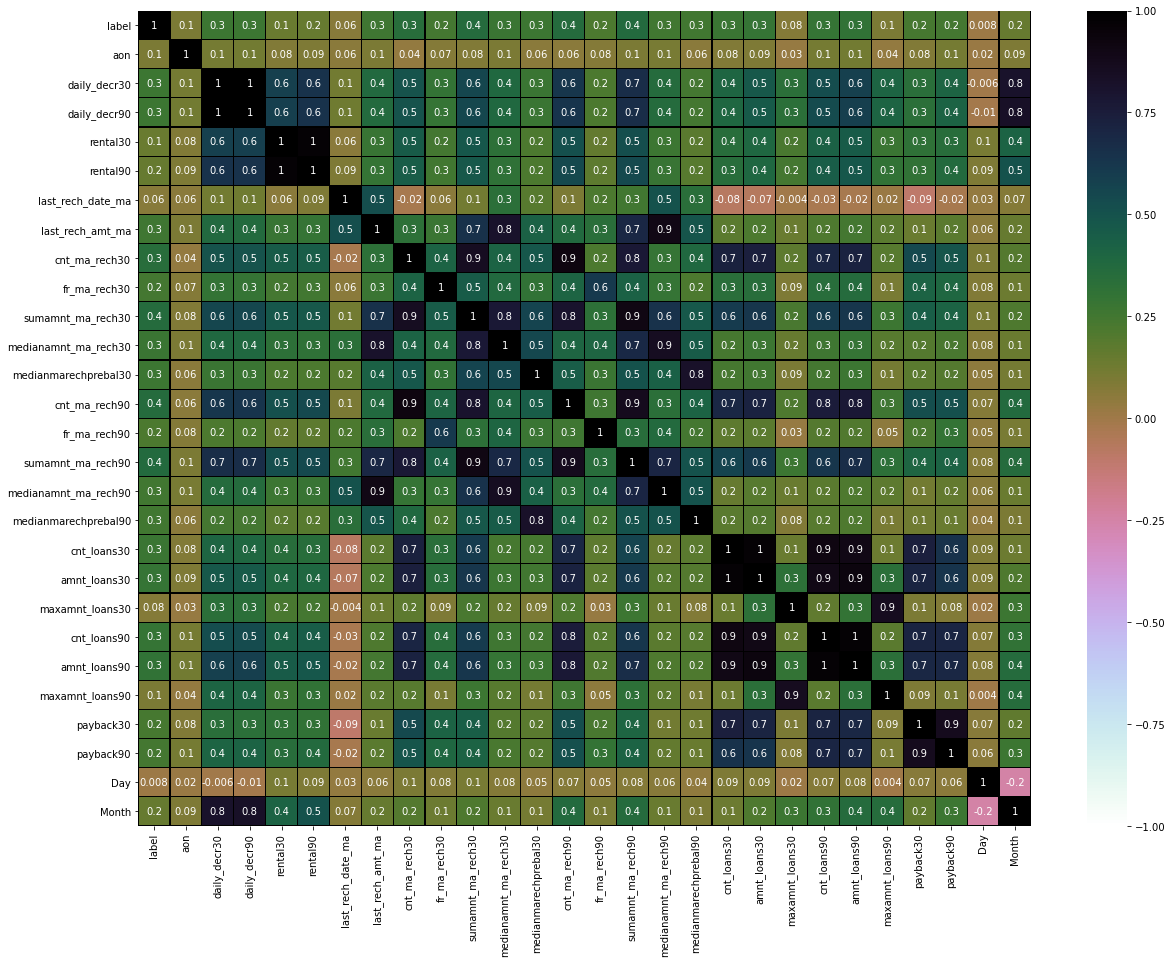

In [58]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1,vmax=1,fmt=".1g",linecolor = "black",annot=True,cmap="cubehelix_r",annot_kws={'size':10})
plt.yticks(rotation=0);

* This heatmap shows the correlation matrix of the data. We can observe the relation between one feature to other and relation between feature and label.
Here we can notice there is no strong relation between features and label.
* Dark shades are highly positively correlated with tha label and light shades are highly negatively correlated with the label.
* The following features have somewhat strong correlation with the label of defaulters and non-defaulters data. Also, we can observe there are no negative correlation between label and features. Most of the features are correlated with each other.
    * sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonasian Rupiah)
    * sumamnt_ma_rech90:Total amount of recharge in main account over last 90 days (in Indonasian Rupiah-)
    * daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    * daily_decr30: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    * cnt_ma_rech30: Number of times main account got recharged in last 30 days
    * cnt_ma_rech90: Number of times main account got recharged in last 90 days
    * cnt_loans30 & cnt_loans90: Number of loans taken by user in last 30 days & 90 days respectively.
    * amnt_loans30 & amnt_loans90: Total amount of loans taken by user in last 30 days and 90 days

In [59]:
cor['label'].sort_values(ascending = False)

label                   1.000000
sumamnt_ma_rech90       0.370102
cnt_ma_rech90           0.363878
sumamnt_ma_rech30       0.361711
cnt_ma_rech30           0.347162
amnt_loans90            0.309039
cnt_loans90             0.293548
amnt_loans30            0.291492
medianamnt_ma_rech30    0.279565
cnt_loans30             0.276082
daily_decr90            0.268775
medianmarechprebal30    0.266752
daily_decr30            0.266444
last_rech_amt_ma        0.262083
medianmarechprebal90    0.257523
medianamnt_ma_rech90    0.252702
payback90               0.244596
fr_ma_rech30            0.243564
payback30               0.236554
fr_ma_rech90            0.221068
rental90                0.155661
Month                   0.151680
rental30                0.142205
maxamnt_loans90         0.101247
aon                     0.097208
maxamnt_loans30         0.075952
last_rech_date_ma       0.064305
Day                     0.008241
Name: label, dtype: float64

Here we can observe the positive correlation between features and label clearly.

# Visualizing the correlation between label and features using bar plot

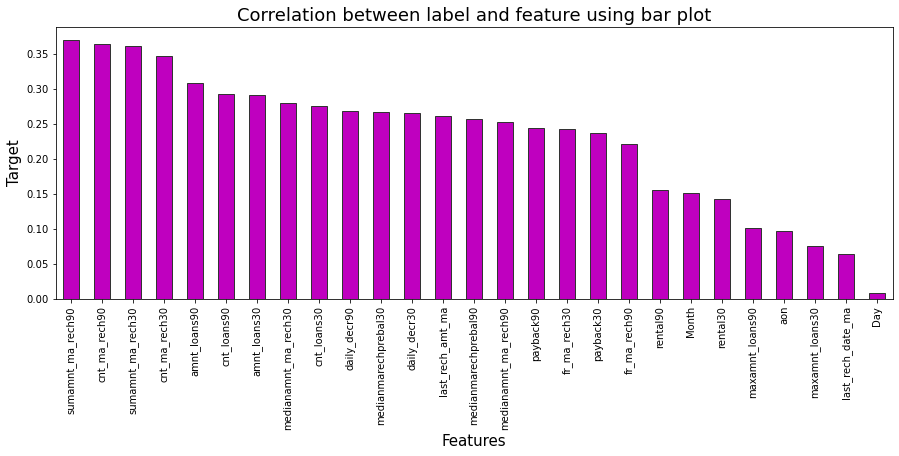

In [76]:
plt.figure(figsize=(15,5))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='m',edgecolor=".2")
plt.xlabel("Features",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive correlation between the label and features. Here the column Day is less correlated with the label compared to others, we can drop these columns if necessary.

# Separating the features and label into x and y

In [60]:
x = df.drop('label',axis=1)
y = df['label']

In [61]:
# Cehcking dimensions of x and y
x.shape, y.shape

((207550, 27), (207550,))

Since skewness is present in one column and some of the columns have outliers and the data is not distributed normally in some of the columns, so lets use MinMaxScaler method to scale the data.

# Feature scaling using MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x) ,columns = x.columns)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
0,0.348970,0.670388,0.661447,0.330465,0.335513,0.378383,0.498865,0.368297,0.990879,0.435328,0.523791,0.239198,0.307937,0.870329,0.378257,0.515526,0.231859,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,1.000000,0.984592,0.633333,0.5
1,0.625204,0.851665,0.834288,0.706042,0.668524,0.865622,0.831756,0.229617,0.000000,0.540837,0.881977,0.529616,0.191924,0.000000,0.466745,0.879174,0.533388,0.000000,0.378664,1.000000,0.000000,0.321358,1.0,0.000000,0.000000,0.300000,1.0
2,0.537141,0.578404,0.572448,0.491889,0.470866,0.463708,0.498865,0.229617,0.000000,0.341592,0.523791,0.543230,0.191924,0.000000,0.298987,0.515526,0.547997,0.000000,0.000000,0.633603,0.000000,0.000000,0.0,0.000000,0.000000,0.600000,1.0
3,0.318099,0.196647,0.198199,0.299475,0.290305,0.995905,0.411921,0.000000,0.000000,0.000000,0.000000,0.000000,0.191924,0.000000,0.252713,0.422273,0.125813,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,0.000000,0.000000,0.166667,0.0
4,0.718606,0.353656,0.353543,0.518649,0.495734,0.526388,0.584318,0.717633,0.448169,0.822222,0.615344,0.414665,0.636788,0.391346,0.736845,0.665467,0.440867,0.910035,0.859875,0.633603,0.784192,0.767230,0.0,0.574148,0.497077,0.700000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207545,0.455692,0.354398,0.354271,0.517436,0.494608,0.248909,0.725540,0.468699,0.448169,0.659938,0.697866,0.598174,0.391972,0.391346,0.565871,0.691610,0.607355,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,0.373728,0.313291,0.533333,0.0
207546,0.761981,0.237307,0.238647,0.583474,0.555762,0.526388,0.379906,0.547743,0.297827,0.436013,0.396916,0.699454,0.559644,0.391346,0.414212,0.388165,0.644966,0.594747,0.561611,0.633603,0.486141,0.484772,0.0,0.373728,0.313291,0.366667,0.0
207547,0.741511,0.848386,0.831831,0.790314,0.820941,0.463708,0.498865,0.613094,0.782544,0.636184,0.523791,0.501085,0.726532,0.586653,0.683256,0.515526,0.489206,0.718742,0.859875,1.000000,0.737513,0.836850,1.0,0.699144,0.610201,0.933333,0.5
207548,0.936069,0.855869,0.839179,0.396689,0.481927,0.378383,0.379906,0.613094,0.615847,0.695437,0.396916,0.702557,0.559644,0.538635,0.675429,0.618639,0.623514,0.392540,0.561611,1.000000,0.486141,0.589386,1.0,0.000000,0.819944,0.800000,0.5


In [63]:
y.value_counts()

1    181388
0     26162
Name: label, dtype: int64

Since we have class imbalancing issue in the dataset, lets use oversampling method to balance the data.

# Oversampling

In [64]:
# Oversampling the data by adding sample to make all categorical quality values same
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y = SM.fit_resample(x,y)

In [65]:
# Checking the value counts of label after perfoming oversampling
y.value_counts()

0    181388
1    181388
Name: label, dtype: int64

So the class imbalancing issue has been resolved and now all the categories have same data ensuring that the machine learning model does not get biased toward one category.

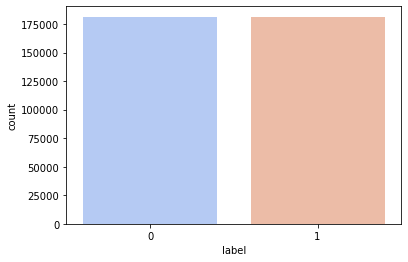

In [66]:
# Visualisin the data after oversampling
sns.countplot(y,palette="coolwarm")
plt.show()

we can clearly visualize the balanced data now.

# Finding the best random state for building Classification Models

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAcc = acc
        maxRS = i
print("Best accuracy is",maxAccu," at random_state " ,maxRS)

Best accuracy is 0  at random_state  199


# Creating new training and testing dataset

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=maxRS)

# Machine Learing Model for Classification with Evaluation Metrics

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score

# Decision Tree Classifier

In [87]:
# Checking Accuracy and evaluation metrics for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

# Accuracy Score
DTC_score = accuracy_score(y_test, predDTC)*100
print("Accuracy Score:", DTC_score)

# ROC AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,predDTC)*100      
print("\nroc_auc_score:", roc_auc_score)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predDTC)
print("\nConfusion Matrix:\n",conf_matrix)

# Classification Report
class_report = classification_report(y_test,predDTC)
print("\nClassification Report:\n", class_report)

# Cross Validation Score
cv_score = (cross_val_score(DTC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

# Result of accuracy minus cv scores
Result = DTC_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 90.99170288423548

roc_auc_score: 90.9911404510675

Confusion Matrix:
 [[50004  4449]
 [ 5355 49025]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     54453
           1       0.92      0.90      0.91     54380

    accuracy                           0.91    108833
   macro avg       0.91      0.91      0.91    108833
weighted avg       0.91      0.91      0.91    108833

Cross Validation Score: 90.93051160843858

Accuracy Score - Cross Validation Score is 0.06119127579690087


Created the Decision Tree Classifier model and checked for its evaluation metrics and it is giving accuracy 90.99%.

# Random Forest Classifier

In [70]:
# Checking Accuracy and evaluation metrics for Random Forest Classifier
RFC = RandomForestClassifier()

RFC.fit(x_train,y_train)                            # Training the model
predRFC = RFC.predict(x_test)                      

RFC_score = accuracy_score(y_test, predRFC)*100     # Accuracy Score 
print("Accuracy Score:", RFC_score)  

from sklearn.metrics import roc_auc_score           #ROC AUC Score
roc_auc_score2 = roc_auc_score(y_test,predRFC)*100      
print("\nroc_auc_score:", roc_auc_score2)

conf_matrix = confusion_matrix(y_test, predRFC)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predRFC) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score2 = (cross_val_score(RFC, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score2)

# Result of accuracy minus cv scores
Result = RFC_score - cv_score2
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 95.15036799500152

roc_auc_score: 95.14999972274325

Confusion Matrix:
 [[52111  2342]
 [ 2936 51444]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     54453
           1       0.96      0.95      0.95     54380

    accuracy                           0.95    108833
   macro avg       0.95      0.95      0.95    108833
weighted avg       0.95      0.95      0.95    108833

Cross Validation Score: 94.9161665081062

Accuracy Score - Cross Validation Score is 0.23420148689531572


Created RandomForestClassifier model and checked for its evaluation metrics. The model giving 95.15% accuracy.

# Extra Tree Classifier

In [118]:
# Checking Accuracy and evaluation metrics for ExtraTrees Classifier
XT = ExtraTreesClassifier()

XT.fit(x_train,y_train)                            # Training the model
predXT = XT.predict(x_test)                       #Predicting y_test

XT_score = accuracy_score(y_test, predXT)*100     # Accuracy Score 
print("Accuracy Score:", XT_score)  

roc_auc_score3 = roc_auc_score(y_test,predXT)*100      # ROC AUC Score
print("\nroc_auc_score:", roc_auc_score3)

conf_matrix = confusion_matrix(y_test, predXT)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predXT) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score3 = (cross_val_score(XT, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score3)

# Result of accuracy minus cv scores
Result = XT_score - cv_score3
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 95.87625076952763

roc_auc_score: 95.87520734398514

Confusion Matrix:
 [[53054  1399]
 [ 3089 51291]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     54453
           1       0.97      0.94      0.96     54380

    accuracy                           0.96    108833
   macro avg       0.96      0.96      0.96    108833
weighted avg       0.96      0.96      0.96    108833

Cross Validation Score: 96.29661549834984

Accuracy Score - Cross Validation Score is -0.4203647288222072


Created the ExtraTrees Classifier model and checked for its evaluation metrics. The ExtraTrees Classifier model giving 95.87% accuracy.

# GradientBoosting Classifier

In [119]:
# Checking Accuracy and evaluation metrics for GradientBoosting Classifier
GB = GradientBoostingClassifier()

GB.fit(x_train,y_train)                            # Training the model
predGB = GB.predict(x_test)                       #Predicting y_test

GB_score = accuracy_score(y_test, predGB)*100     # Accuracy Score 
print("Accuracy Score:", GB_score)  

roc_auc_score4 = roc_auc_score(y_test,predGB)*100      # ROC AUC Score
print("\nroc_auc_score:", roc_auc_score4)

conf_matrix = confusion_matrix(y_test, predGB)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predGB) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score4 = (cross_val_score(GB, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score4)

# Result of accuracy minus cv scores
Result = GB_score - cv_score4
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 90.20242022180773

roc_auc_score: 90.20137239461636

Confusion Matrix:
 [[49968  4485]
 [ 6178 48202]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     54453
           1       0.91      0.89      0.90     54380

    accuracy                           0.90    108833
   macro avg       0.90      0.90      0.90    108833
weighted avg       0.90      0.90      0.90    108833

Cross Validation Score: 89.80722454871677

Accuracy Score - Cross Validation Score is 0.39519567309095294


Created GradientBoosting Classifier and checked for its evaluation metrics. The model giving 90.20% accuracy.

# Bagging Classifier

In [120]:
# Checking Accuracy and evaluation metrics for Bagging Classifier
BC = BaggingClassifier()

BC.fit(x_train,y_train)                            # Training the model
predBC = BC.predict(x_test)                       #Predicting y_test

BC_score = accuracy_score(y_test, predBC)*100     # Accuracy Score 
print("Accuracy Score:", BC_score)  

roc_auc_score6 = roc_auc_score(y_test,predBC)*100      # ROC AUC Score
print("\nroc_auc_score:", roc_auc_score6)

conf_matrix = confusion_matrix(y_test, predBC)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predBC) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score6 = (cross_val_score(BC, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score6)

# Result of accuracy minus cv scores
Result = BC_score - cv_score6
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 94.03122214769417

roc_auc_score: 94.03027403700096

Confusion Matrix:
 [[51972  2481]
 [ 4015 50365]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     54453
           1       0.95      0.93      0.94     54380

    accuracy                           0.94    108833
   macro avg       0.94      0.94      0.94    108833
weighted avg       0.94      0.94      0.94    108833

Cross Validation Score: 93.75622173154864

Accuracy Score - Cross Validation Score is 0.27500041614553083


Created Bagging Classifier and checked for its evaluation metrics. The model giving 94.03% accuracy.

From the difference between accuracy and cross validation score, RandomForestClassifier has least difference compared to other models. So we can conclude that RandomForestClassifier as our best fitting model.

# Plotting ROC and comparing AUC for all the models used

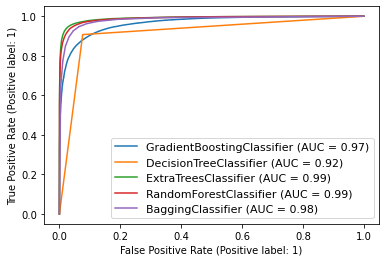

In [125]:
#Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(GB,x_test,y_test)    # ax_=Axes with confusion matrix
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XT, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Hyper Parameter Tunning

In [85]:
from sklearn.model_selection import GridSearchCV

# Random Forest Clasifier
parameters = {'n_estimators': [10, 20, 50],
              'max_depth': [4,6,8],  
              'max_features':['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 6]}


In [86]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [87]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 6],
                         'n_estimators': [10, 20, 50]})

In [88]:
GSV.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 50}

In [92]:
# Creating final model 
MicroCredit_model = RandomForestClassifier(n_estimators=50,min_samples_split=6,max_features="sqrt",max_depth=8)
MicroCredit_model.fit(x_train, y_train)
pred = MicroCredit_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score for the Best Model is:", acc_score*100)

Accuracy score for the Best Model is: 85.93716979225051


Hyper parameter tuning using best parameters of RandomForestClassifier and the accuracy of the model after hyperparameter tuning is reduce so we use our Randomforest Model.

# Saving the model

In [93]:
# Saving the model using .pkl
import joblib
joblib.dump(RandomForestClassifier,"Micro_Credit_Loan_Defaulter.pkl")

['Micro_Credit_Loan_Defaulter.pkl']

# Loading and predicting the saved model

In [99]:
# Loading the saved model
model=joblib.load("Micro_Credit_Loan_Defaulter.pkl")

In [104]:
#Prediction
pred_data=pd.DataFrame()
pred_data['Real_values']=y_test
pred_data['Predicted_by_model']=pred
pred_data

,Real_values,Predicted_by_model
157913,1,1
241571,0,1
104123,1,1
98635,1,1
218323,0,0
...,...,...
88128,1,1
47453,1,0
118640,0,0
261551,0,0


This is the dataframe having Real data with the predicted data from the best model.

# Conclusion:

 This case study aims to give an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.
- From this dataset we were able to understand that the selection of customers for the credit to know whether they are defaulters or non-defaulters are done on the basis of different features.
- First, we loaded the dataset and have done data cleaning and EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.
- Then we did the model training, building the model and finding out the best model on the basis of different metrices like Accuracy Score, Cross Validation Score, roc_auc_score, precision, recall, f1score etc. We tried ensemble techniques like Random Forest Classifier, Extra Trees Classifier, GradientBoosting Classifier, Bagging Classifier etc and some other models like Decision Tree Classifier.
- We got RandomForestClassifier as the best model among all the models as it gave least difference of accuracy and cross validation score. So we concluded that RandomForestClassifier as the best algorithm as it was giving high accuracy and AUC.
- After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values.
- Overall, we can say that this dataset is good for predicting the defaulters level using classification analysis and conclude that RandomForestClassifier is the best working algorithm model we obtained. We can improve the data by adding some more features.